In [1]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings
#import sktime

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler


# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.optimizers import Adam

warnings.filterwarnings('ignore')

In [2]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'mase'])
metrics_df

,Model,MAE,mase


In [3]:
def mean_absolute_scaled_error(y_true, y_pred):
    naive_forecast = np.array(y_true[:-1])
    y_true_insample = np.array(y_true[1:])
    insample_error = np.abs(y_true_insample - naive_forecast)
    # Calculate the forecast errors
    forecast_error = np.abs(y_true - y_pred)
    # Calculate the MASE
    mase = np.mean(forecast_error) / np.mean(insample_error)
    return mase


In [4]:
czech  = pd.read_csv('univariate_models/univariate_df_Czechia.csv')
eston  = pd.read_csv('univariate_models/univariate_df_Estonia.csv')
franc  = pd.read_csv('univariate_models/univariate_df_France.csv')
malay  = pd.read_csv('univariate_models/univariate_df_Malaysia.csv')
belgi  = pd.read_csv('univariate_models/univariate_df_Belgium.csv')
chile  = pd.read_csv('univariate_models/univariate_df_Chile.csv')
irela  = pd.read_csv('univariate_models/univariate_df_Ireland.csv')
israe  = pd.read_csv('univariate_models/univariate_df_Israel.csv')
italy  = pd.read_csv('univariate_models/univariate_df_Italy.csv')
us  = pd.read_csv('univariate_models/univariate_df_United_States.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'univariate_models/univariate_df_Czechia.csv'

In [126]:
# setting index to the date time value 
def index_dt(c):
    c.set_index('date')

czech= czech.set_index('date')
eston =eston.set_index('date')
franc =franc.set_index('date')
malay = malay.set_index('date')
belgi = belgi.set_index('date')
chile =chile.set_index('date')
irela = irela.set_index('date')
isrea = israe.set_index('date')
italy = italy.set_index('date')
us = us.set_index('date')


## Data Spliting 
In time series prediction, it is crucial to handle the temporal aspect properly when splitting the data into training and testing sets. Unlike random data, time series data has a sequential structure, and random splitting can lead to information leakage and overly optimistic performance estimates.

In [127]:
#sort index
for x in [czech, eston, franc, malay,belgi, chile, irela, israe, italy, us]:
    x = x.sort_index()

In [128]:
train_size = int(len(czech) * 0.8)
czech_train, czech_test = czech[0:train_size], czech[train_size:].drop('Unnamed: 0', axis=1)
eston_train, eston_test = eston[0:train_size], eston[train_size:].drop('Unnamed: 0', axis=1)
franc_train, franc_test = franc[0:train_size], franc[train_size:].drop('Unnamed: 0', axis=1)
malay_train, malay_test = malay[0:train_size], malay[train_size:].drop('Unnamed: 0', axis=1)
belgi_train, belgi_test = belgi[0:train_size], belgi[train_size:].drop('Unnamed: 0', axis=1)
chile_train, chile_test = chile[0:train_size], chile[train_size:].drop('Unnamed: 0', axis=1)
irela_train, irela_test = irela[0:train_size], irela[train_size:].drop('Unnamed: 0', axis=1)
israe_train, israe_test = israe[0:train_size], israe[train_size:].drop('Unnamed: 0', axis=1)
italy_train, italy_test = italy[0:train_size], italy[train_size:].drop('Unnamed: 0', axis=1)
us_train, us_test = us[0:train_size], us[train_size:].drop('Unnamed: 0', axis=1)
us_test

,new_deaths,diff1
date,,
2023-04-02,1746.0,-338.0
2023-04-09,1729.0,-17.0
2023-04-16,1290.0,-439.0
2023-04-23,1198.0,-92.0
2023-04-30,1046.0,-152.0
2023-05-07,1146.0,100.0
2023-05-14,1943.0,797.0
2023-05-21,755.0,-1188.0
2023-05-28,738.0,-17.0


## Czechia Models - arima, gs arima, sarima 

In [129]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(czech_train['new_deaths'],order=(1,1,1))
cmodel_fit=model.fit()

<Axes: xlabel='date'>

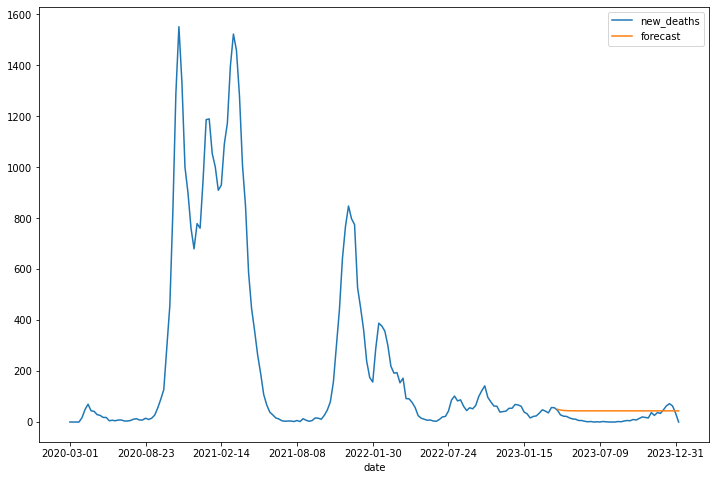

In [130]:
czech['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))

Text(0, 0.5, 'New Deaths')

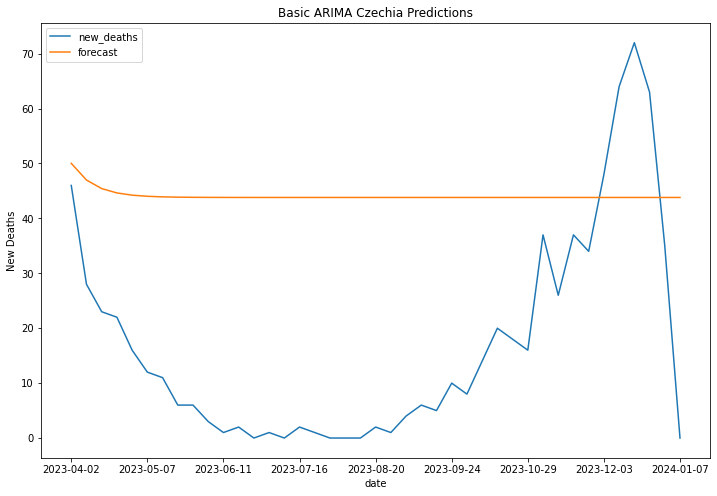

In [131]:
czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Czechia Predictions')
plt.ylabel('New Deaths')

In [132]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a czech',mae, mase]

In [133]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321


In [134]:
results=[]
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(czech_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')

,p,q,aic
7,2,1,1809.368437
8,2,2,1811.107420
6,2,0,1813.130142
4,1,1,1815.592965
5,1,2,1816.988740
2,0,2,1820.796323
3,1,0,1821.168075
1,0,1,1832.961045
0,0,0,1911.757113


Text(0, 0.5, 'New Deaths')

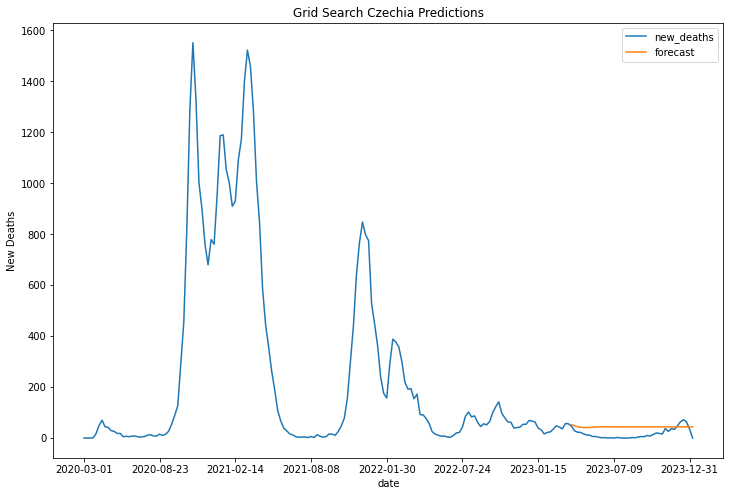

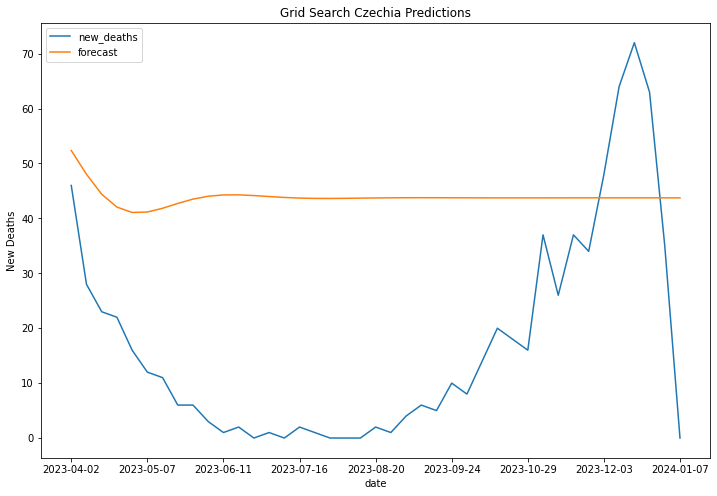

In [135]:
model=ARIMA(czech_train['new_deaths'],order=(2,1,1))
cmodel_fit=model.fit()

czech['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

czech_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
czech_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Grid Search Czechia Predictions')
plt.ylabel('New Deaths')

In [136]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [137]:
czech_test

,new_deaths,diff1,forecast
date,,,
2023-04-02,46.0,-10.0,52.358753
2023-04-09,28.0,-18.0,48.044273
2023-04-16,23.0,-5.0,44.399280
2023-04-23,22.0,-1.0,42.059506
2023-04-30,16.0,-6.0,41.080490
2023-05-07,12.0,-4.0,41.157427
2023-05-14,11.0,-1.0,41.845981
2023-05-21,6.0,-5.0,42.728838
2023-05-28,6.0,0.0,43.508472


In [138]:
actuals = czech_test['new_deaths']  
predictions = czech_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base grid searched czech',mae, mase]

In [139]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188


In [140]:
#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(czech_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
czech_test['seasonal'] = pred
mae = mean_absolute_error(czech_test['new_deaths'], pred)
mase = mean_absolute_scaled_error(czech_test['new_deaths'], czech_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal czech',mae, mase]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22489D+00    |proj g|=  2.11474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.473D-06   6.225D+00
  F =   6.2246440947773483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.88458D+00    |proj g|=  4.88439D-03

At iterate   10    f=  5.82132D+00    |proj g|=  7.42934D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   2.305D-06   5.821D+00
  F =   5.8213237783575495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89609D+00    |proj g|=  1.22524D-01

At iterate    5    f=  5.87117D+00    |proj g|=  6.41465D-03

At iter

 This problem is unconstrained.



At iterate   40    f=  5.81950D+00    |proj g|=  1.14897D-04

At iterate   45    f=  5.81950D+00    |proj g|=  7.14020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     55      1     0     0   8.404D-06   5.820D+00
  F =   5.8195012944999673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95831D+00    |proj g|=  1.62833D-02

At iterate    5    f=  5.95805D+00    |proj g|=  1.61408D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.85395D+00    |proj g|=  1.05227D-02

At iterate   10    f=  5.85132D+00    |proj g|=  5.82302D-03

At iterate   15    f=  5.82108D+00    |proj g|=  1.28664D-04

At iterate   20    f=  5.82106D+00    |proj g|=  1.55712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   7.873D-06   5.821D+00
  F =   5.8210543935245278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79241D+00    |proj g|=  2.22549D-02

At iterate    5    f=  5.73919D+00    |proj g|=  6.77834D-02

At iterate   10    f=  5.58747D+00    |proj g|=  3.39898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   1.316D-06   5.587D+00
  F =   5.5874472459049613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.84575D+00    |proj g|=  7.19960D-03

At iterate   10    f=  5.78010D+00    |proj g|=  1.42156D-02

At iterate   15    f=  5.76960D+00    |proj g|=  1.82259D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     26      1     0     0   1.400D-06   5.770D+00
  F =   5.7695776024219798     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83280D+00    |proj g|=  5.35549D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.81307D+00    |proj g|=  4.11841D-03

At iterate   10    f=  5.75686D+00    |proj g|=  2.27413D-01

At iterate   15    f=  5.69993D+00    |proj g|=  9.96566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   8.742D-06   5.700D+00
  F =   5.6999344257691398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82443D+00    |proj g|=  3.89818D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97645D+00    |proj g|=  4.56682D-02

At iterate    5    f=  5.94693D+00    |proj g|=  2.47249D-02

At iterate   10    f=  5.88620D+00    |proj g|=  5.86784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   4.339D-06   5.885D+00
  F =   5.8851407300058183     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.61644D+00    |proj g|=  1.92022D-01

At iterate   15    f=  5.52282D+00    |proj g|=  3.59760D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     26      1     0     0   1.441D-05   5.522D+00
  F =   5.5218898982298050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.87667D+00    |proj g|=  2.05696D-02

At iterate    5    f=  5.87412D+00    |proj g|=  5.21946D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.60273D+00    |proj g|=  2.62473D-01

At iterate   15    f=  5.52578D+00    |proj g|=  3.34496D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     28      1     0     0   4.416D-06   5.526D+00
  F =   5.5257689936079855     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83272D+00    |proj g|=  5.27036D-02

At iterate    5    f=  5.81164D+00    |proj g|=  1.46757D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.66565D+00    |proj g|=  6.91891D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     36      1     0     0   6.919D-06   5.666D+00
  F =   5.6656523832851642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84962D+00    |proj g|=  3.67249D-02

At iterate    5    f=  5.81061D+00    |proj g|=  8.46303D-03

At iterate   10    f=  5.80605D+00    |proj g|=  5.19733D-03

At iter

 This problem is unconstrained.



At iterate   35    f=  5.52457D+00    |proj g|=  7.80055D-04

At iterate   40    f=  5.52455D+00    |proj g|=  3.65567D-04

At iterate   45    f=  5.52454D+00    |proj g|=  2.02461D-03

At iterate   50    f=  5.52452D+00    |proj g|=  1.49821D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   1.498D-03   5.525D+00
  F =   5.5245222766291429     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.69085D+00    |proj g|=  1.25417D-02

At iterate   10    f=  5.58817D+00    |proj g|=  1.76112D-01

At iterate   15    f=  5.52655D+00    |proj g|=  4.58249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   4.232D-06   5.527D+00
  F =   5.5265379206838823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79223D+00    |proj g|=  1.25019D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71914D+00    |proj g|=  8.64564D-02

At iterate    5    f=  5.69344D+00    |proj g|=  4.98926D-03

At iterate   10    f=  5.58169D+00    |proj g|=  1.01038D-02

At iterate   15    f=  5.57871D+00    |proj g|=  1.03750D-02

At iterate   20    f=  5.53810D+00    |proj g|=  1.21366D-02

At iterate   25    f=  5.53734D+00    |proj g|=  7.26930D-04

At iterate   30    f=  5.53692D+00    |proj g|=  5.28743D-04

At iterate   35    f=  5.53651D+00    |proj g|=  1.02158D-02

At iterate   40    f=  5.52967D+00    |proj g|=  5.72455D-03

At iterate   45    f=  5.52613D+00    |proj g|=  1.31617D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.68243D+00    |proj g|=  1.30840D-02

At iterate   15    f=  5.53110D+00    |proj g|=  2.01377D-02

At iterate   20    f=  5.52683D+00    |proj g|=  1.59041D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   1.022D-06   5.527D+00
  F =   5.5268276230571525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74077D+00    |proj g|=  1.93994D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.53203D+00    |proj g|=  4.73877D-02

At iterate   15    f=  5.52938D+00    |proj g|=  5.61791D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     21      1     0     0   5.618D-06   5.529D+00
  F =   5.5293803872258955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91719D+00    |proj g|=  7.44959D-02

At iterate    5    f=  5.90870D+00    |proj g|=  6.32899D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91719D+00    |proj g|=  5.07121D-01

At iterate    5    f=  5.68462D+00    |proj g|=  3.96477D-02

At iterate   10    f=  5.67522D+00    |proj g|=  9.21935D-03

At iterate   15    f=  5.51266D+00    |proj g|=  4.55988D-02

At iterate   20    f=  5.51057D+00    |proj g|=  3.80869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26      1     0     0   2.671D-06   5.511D+00
  F =   5.5105714387282463     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.68124D+00    |proj g|=  2.96583D-02

At iterate   10    f=  5.62799D+00    |proj g|=  1.01634D-01

At iterate   15    f=  5.51378D+00    |proj g|=  1.43042D-02

At iterate   20    f=  5.51331D+00    |proj g|=  3.37064D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     27      1     0     0   3.371D-07   5.513D+00
  F =   5.5133055715716575     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   5.449D-06   5.510D+00
  F =   5.5096552754947874     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72356D+00    |proj g|=  1.67910D-01

At iterate    5    f=  5.68155D+00    |proj g|=  7.78961D-03

At iterate   10    f=  5.67868D+00    |proj g|=  1.15469D-02

At iterate   15    f=  5.59238D+00    |proj g|=  1.48287D-01

At iter

 This problem is unconstrained.



At iterate   25    f=  5.51272D+00    |proj g|=  7.28921D-05

At iterate   30    f=  5.51272D+00    |proj g|=  7.45404D-04

At iterate   35    f=  5.51265D+00    |proj g|=  2.50931D-03

At iterate   40    f=  5.51263D+00    |proj g|=  9.81826D-04

At iterate   45    f=  5.51260D+00    |proj g|=  4.18804D-04

At iterate   50    f=  5.51259D+00    |proj g|=  3.90200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   3.902D-04   5.513D+00
  F =   5.5125896773816967     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.90037D+00    |proj g|=  5.09052D-02

At iterate   10    f=  5.88917D+00    |proj g|=  7.23130D-03

At iterate   15    f=  5.88800D+00    |proj g|=  3.04061D-03

At iterate   20    f=  5.88176D+00    |proj g|=  1.62168D-03

At iterate   25    f=  5.88174D+00    |proj g|=  3.15018D-04

At iterate   30    f=  5.88006D+00    |proj g|=  3.37429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     52      1     0     0   9.700D-06   5.880D+00
  F =   5.8800346071706571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.78439D+00    |proj g|=  3.31065D-03

At iterate   10    f=  5.77296D+00    |proj g|=  2.59159D-02

At iterate   15    f=  5.73376D+00    |proj g|=  2.02086D-02

At iterate   20    f=  5.73340D+00    |proj g|=  2.31921D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   2.319D-06   5.733D+00
  F =   5.7333961440816106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  5.55046D+00    |proj g|=  1.76700D-01

At iterate   30    f=  5.51275D+00    |proj g|=  1.73184D-03

At iterate   35    f=  5.51275D+00    |proj g|=  4.87020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     50      1     0     0   3.688D-06   5.513D+00
  F =   5.5127455370048359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72327D+00    |proj g|=  7.96077D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  5.58372D+00    |proj g|=  1.28185D-02

At iterate   25    f=  5.58030D+00    |proj g|=  1.32565D-02

At iterate   30    f=  5.57557D+00    |proj g|=  1.75841D-02

At iterate   35    f=  5.55771D+00    |proj g|=  2.22566D-02

At iterate   40    f=  5.53084D+00    |proj g|=  1.47061D-01

At iterate   45    f=  5.51138D+00    |proj g|=  7.39618D-03

At iterate   50    f=  5.50972D+00    |proj g|=  2.19072D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   2.191D-02   5.510D+00
  F =   5.5097214753789086     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75572D+00    |proj g|=  6.43029D-02

At iterate    5    f=  5.69724D+00    |proj g|=  2.07899D-02

At iterate   10    f=  5.68907D+00    |proj g|=  5.43682D-03

At iterate   15    f=  5.59056D+00    |proj g|=  4.85348D-02

At iterate   20    f=  5.57912D+00    |proj g|=  1.54393D-03

At iterate   25    f=  5.57855D+00    |proj g|=  8.96514D-03

At iterate   30    f=  5.57837D+00    |proj g|=  2.08805D-04

At iterate   35    f=  5.57806D+00    |proj g|=  2.55159D-02

At iterate   40    f=  5.57108D+00    |proj g|=  9.21214D-02

At iterate   45    f=  5.53589D+00    |proj g|=  5.22536D-02

At iterate   50    f=  5.50935D+00    |proj g|=  2.00601D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   25    f=  5.51242D+00    |proj g|=  3.06499D-03

At iterate   30    f=  5.51225D+00    |proj g|=  1.33634D-03

At iterate   35    f=  5.51205D+00    |proj g|=  1.65459D-03

At iterate   40    f=  5.51198D+00    |proj g|=  6.17597D-04

At iterate   45    f=  5.51198D+00    |proj g|=  2.98237D-04

At iterate   50    f=  5.51195D+00    |proj g|=  1.31442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   1.314D-03   5.512D+00
  F =   5.5119521638778970     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76518D+00    |proj g|=  9.43597D-02

At iterate    5    f=  5.75401D+00    |proj g|=  3.03513D-03

At iterate   10    f=  5.74726D+00    |proj g|=  5.77867D-02

At iterate   15    f=  5.72897D+00    |proj g|=  2.11694D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   1.748D-05   5.729D+00
  F =   5.7289614627015801     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71216D+00    |proj g|=  8.01911D-02

At iterate    5    f=  5.70197D+00    |proj g|=  4.67808D-03

At iterate   10    f=  5.69058D+00    |proj g|=  7.95638D-02

At iterate   15    f=  5.64730D+00    |proj g|=  1.95191D-02

At iterate   20    f=  5.64699D+00    |proj g|=  8.24034D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   8.240D-06   5.647D+00
  F =   5.6469949019475187     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  5.51118D+00    |proj g|=  1.18535D-02

At iterate   30    f=  5.51094D+00    |proj g|=  7.63237D-04

At iterate   35    f=  5.51093D+00    |proj g|=  9.43714D-05

At iterate   40    f=  5.51093D+00    |proj g|=  1.01354D-03

At iterate   45    f=  5.51090D+00    |proj g|=  1.93863D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     51      1     0     0   1.939D-05   5.511D+00
  F =   5.5109019999885138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.76615D+00    |proj g|=  4.59359D-03

At iterate   30    f=  5.76602D+00    |proj g|=  1.11268D-03

At iterate   35    f=  5.76600D+00    |proj g|=  3.84594D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     44      1     0     0   8.900D-06   5.766D+00
  F =   5.7660031131168799     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68041D+00    |proj g|=  8.57985D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  5.53274D+00    |proj g|=  2.77005D-02

At iterate   25    f=  5.52710D+00    |proj g|=  2.00221D-03

At iterate   30    f=  5.52657D+00    |proj g|=  2.12474D-04

At iterate   35    f=  5.52653D+00    |proj g|=  1.23231D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   3.775D-05   5.527D+00
  F =   5.5265331036416914     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.70292D+00    |proj g|=  1.97418D-02

At iterate   15    f=  5.67230D+00    |proj g|=  2.36594D-02

At iterate   20    f=  5.66951D+00    |proj g|=  3.23195D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   7.587D-06   5.670D+00
  F =   5.6695124203182097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72815D+00    |proj g|=  1.08682D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  5.62523D+00    |proj g|=  5.70485D-03

At iterate   10    f=  5.61460D+00    |proj g|=  1.26036D-02

At iterate   15    f=  5.60858D+00    |proj g|=  5.67231D-03

At iterate   20    f=  5.58571D+00    |proj g|=  4.68644D-02

At iterate   25    f=  5.53357D+00    |proj g|=  5.39632D-02

At iterate   30    f=  5.52811D+00    |proj g|=  1.27474D-03

At iterate   35    f=  5.52737D+00    |proj g|=  9.86146D-03

At iterate   40    f=  5.52630D+00    |proj g|=  1.05256D-03

At iterate   45    f=  5.52624D+00    |proj g|=  6.13698D-04

At iterate   50    f=  5.52618D+00    |proj g|=  6.15469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.63165D+00    |proj g|=  2.16319D-02

At iterate   30    f=  5.62977D+00    |proj g|=  8.10072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     39      1     0     0   2.567D-05   5.630D+00
  F =   5.6297675710523771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72403D+00    |proj g|=  9.99921D-02

At iterate    5    f=  5.64399D+00    |proj g|=  8.66055D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  5.59935D+00    |proj g|=  3.46653D-02

At iterate   25    f=  5.57012D+00    |proj g|=  3.51867D-02

At iterate   30    f=  5.53096D+00    |proj g|=  1.98892D-02

At iterate   35    f=  5.52981D+00    |proj g|=  7.23916D-03

At iterate   40    f=  5.52926D+00    |proj g|=  2.00590D-03

At iterate   45    f=  5.52911D+00    |proj g|=  5.49852D-04

At iterate   50    f=  5.52911D+00    |proj g|=  8.89906D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   8.899D-05   5.529D+00
  F =   5.5291075816898854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.76532D+00    |proj g|=  2.22519D-03

At iterate   40    f=  5.76527D+00    |proj g|=  1.25874D-03

At iterate   45    f=  5.76526D+00    |proj g|=  2.33437D-04

At iterate   50    f=  5.76526D+00    |proj g|=  4.59777D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   4.598D-05   5.765D+00
  F =   5.7652601369148364     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  5.56988D+00    |proj g|=  5.15986D-02

At iterate   25    f=  5.52076D+00    |proj g|=  3.09939D-02

At iterate   30    f=  5.51005D+00    |proj g|=  1.47522D-02

At iterate   35    f=  5.50898D+00    |proj g|=  5.25827D-03

At iterate   40    f=  5.50880D+00    |proj g|=  2.88877D-03

At iterate   45    f=  5.50843D+00    |proj g|=  5.17901D-03

At iterate   50    f=  5.50833D+00    |proj g|=  1.13531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   1.135D-05   5.508D+00
  F =   5.5083313377969931     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.51439D+00    |proj g|=  7.64298D-02

At iterate   20    f=  5.50879D+00    |proj g|=  1.79753D-03

At iterate   25    f=  5.50845D+00    |proj g|=  3.86738D-04

At iterate   30    f=  5.50835D+00    |proj g|=  2.96154D-03

At iterate   35    f=  5.50827D+00    |proj g|=  7.14934D-04

At iterate   40    f=  5.50825D+00    |proj g|=  6.07886D-04

At iterate   45    f=  5.50824D+00    |proj g|=  6.90240D-05

At iterate   50    f=  5.50824D+00    |proj g|=  6.36686D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   6.367D-05   5.508D+00
  F =   5.50824042278

 This problem is unconstrained.



At iterate    5    f=  5.63769D+00    |proj g|=  8.65573D-03

At iterate   10    f=  5.63300D+00    |proj g|=  7.59985D-03

At iterate   15    f=  5.57041D+00    |proj g|=  3.40117D-02

At iterate   20    f=  5.55019D+00    |proj g|=  4.33422D-02

At iterate   25    f=  5.51730D+00    |proj g|=  3.22302D-02

At iterate   30    f=  5.51142D+00    |proj g|=  1.38150D-02

At iterate   35    f=  5.50920D+00    |proj g|=  1.20565D-03

At iterate   40    f=  5.50918D+00    |proj g|=  3.56823D-04

At iterate   45    f=  5.50918D+00    |proj g|=  1.08451D-04

At iterate   50    f=  5.50916D+00    |proj g|=  6.99761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.68933D+00    |proj g|=  1.24671D-02

At iterate   10    f=  5.68331D+00    |proj g|=  1.37599D-02

At iterate   15    f=  5.67585D+00    |proj g|=  2.71819D-02

At iterate   20    f=  5.62739D+00    |proj g|=  4.86258D-02

At iterate   25    f=  5.61175D+00    |proj g|=  1.04516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     34      1     0     0   4.459D-06   5.612D+00
  F =   5.6117498345519534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.65358D+00    |proj g|=  5.74594D-02

At iterate   10    f=  5.63378D+00    |proj g|=  5.08093D-03

At iterate   15    f=  5.62076D+00    |proj g|=  5.07572D-02

At iterate   20    f=  5.56533D+00    |proj g|=  4.18655D-02

At iterate   25    f=  5.51023D+00    |proj g|=  2.31845D-02

At iterate   30    f=  5.50950D+00    |proj g|=  8.69625D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     41      1     0     0   8.696D-05   5.510D+00
  F =   5.5095039578547302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  5.51542D+00    |proj g|=  1.12157D-02

At iterate   25    f=  5.51374D+00    |proj g|=  4.42131D-03

At iterate   30    f=  5.51258D+00    |proj g|=  2.89437D-04

At iterate   35    f=  5.51251D+00    |proj g|=  1.44183D-03

At iterate   40    f=  5.51212D+00    |proj g|=  4.53460D-03

At iterate   45    f=  5.50763D+00    |proj g|=  2.06860D-03

At iterate   50    f=  5.50762D+00    |proj g|=  7.48255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     69      1     0     0   7.483D-05   5.508D+00
  F =   5.5076217089928701     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


In [141]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,24.199009,3.999836


Text(0, 0.5, 'New Deaths')

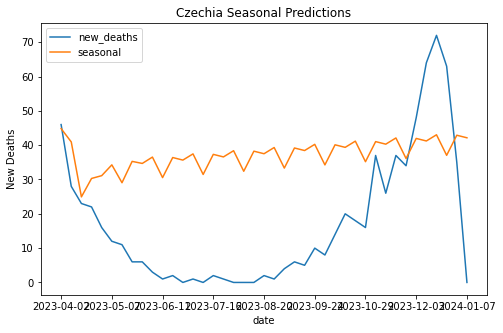

In [142]:
czech_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Czechia Seasonal Predictions')
plt.ylabel('New Deaths')

## Estonia Models - arima, gs arima, sarima 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16490D+00    |proj g|=  3.89608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.561D-06   4.165D+00
  F =   4.1648859939985323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.15829D+00    |proj g|=  1.04126D-02

At iterate   10    f=  4.15714D+00    |proj g|=  2.68120D-03

At iterate   15    f=  4.15686D+00    |proj g|=  6.42956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     33      1     0     0   1.451D-05   4.157D+00
  F =   4.1567973206254445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16780D+00    |proj g|=  1.47154D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  4.15683D+00    |proj g|=  8.80930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   3.827D-06   4.157D+00
  F =   4.1567751749045012     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15898D+00    |proj g|=  2.47507D-02

At iterate    5    f=  4.15798D+00    |proj g|=  1.57671D-02

At iterate   10    f=  4.15709D+00    |proj g|=  1.94475D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.97505D+00    |proj g|=  2.46362D-03

At iterate   15    f=  3.97497D+00    |proj g|=  2.64743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   9.017D-06   3.975D+00
  F =   3.9749632818416765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00315D+00    |proj g|=  1.50024D-01

At iterate    5    f=  3.97980D+00    |proj g|=  1.43389D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00430D+00    |proj g|=  1.45495D-01

At iterate    5    f=  3.97850D+00    |proj g|=  2.98254D-02

At iterate   10    f=  3.97485D+00    |proj g|=  4.45727D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     13      1     0     0   3.629D-06   3.975D+00
  F =   3.9748461725280211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.97226D+00    |proj g|=  1.55232D-02

At iterate   25    f=  3.97118D+00    |proj g|=  1.03104D-02

At iterate   30    f=  3.97087D+00    |proj g|=  1.59979D-03

At iterate   35    f=  3.97061D+00    |proj g|=  2.74861D-03

At iterate   40    f=  3.97055D+00    |proj g|=  4.36688D-04

At iterate   45    f=  3.97050D+00    |proj g|=  3.71774D-04

At iterate   50    f=  3.97049D+00    |proj g|=  3.45083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   3.451D-04   3.970D+00
  F =   3.9704915923925372     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97025D+00    |proj g|=  1.00204D-01

At iterate    5    f=  3.95080D+00    |proj g|=  8.15377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   2.827D-06   3.951D+00
  F =   3.9507170339332931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95627D+00    |proj g|=  2.97109D-02

At iterate   10    f=  3.94759D+00    |proj g|=  5.86579D-03

At iterate   15    f=  3.94741D+00    |proj g|=  1.13533D-02

At iterate   20    f=  3.94703D+00    |proj g|=  6.32218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.609D-05   3.947D+00
  F =   3.9470237689695873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  3.94683D+00    |proj g|=  1.32370D-02

At iterate   30    f=  3.94638D+00    |proj g|=  5.80509D-03

At iterate   35    f=  3.94581D+00    |proj g|=  4.11169D-03

At iterate   40    f=  3.94557D+00    |proj g|=  9.86589D-04

At iterate   45    f=  3.94542D+00    |proj g|=  7.32848D-04

At iterate   50    f=  3.94540D+00    |proj g|=  2.24861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   2.249D-04   3.945D+00
  F =   3.9454022831295510     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.97758D+00    |proj g|=  2.44258D-03

At iterate   10    f=  3.97756D+00    |proj g|=  3.54796D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   3.548D-06   3.978D+00
  F =   3.9775575426159007     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97505D+00    |proj g|=  2.02365D-02

At iterate    5    f=  3.97464D+00    |proj g|=  3.09187D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.97459D+00    |proj g|=  4.91045D-04

At iterate   15    f=  3.97452D+00    |proj g|=  1.00943D-02

At iterate   20    f=  3.97308D+00    |proj g|=  3.14481D-02

At iterate   25    f=  3.97065D+00    |proj g|=  1.12533D-02

At iterate   30    f=  3.97007D+00    |proj g|=  1.23194D-02

At iterate   35    f=  3.96804D+00    |proj g|=  3.98461D-02

At iterate   40    f=  3.96797D+00    |proj g|=  1.16325D-03

At iterate   45    f=  3.96791D+00    |proj g|=  1.47329D-02

At iterate   50    f=  3.96776D+00    |proj g|=  4.09759D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.95254D+00    |proj g|=  5.56703D-03

At iterate   20    f=  3.95245D+00    |proj g|=  6.40354D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   6.404D-06   3.952D+00
  F =   3.9524514366981998     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96135D+00    |proj g|=  2.81030D-02

At iterate    5    f=  3.95518D+00    |proj g|=  2.91091D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96317D+00    |proj g|=  5.11391D-02

At iterate    5    f=  3.95794D+00    |proj g|=  3.85492D-02

At iterate   10    f=  3.95179D+00    |proj g|=  2.57748D-03

At iterate   15    f=  3.95154D+00    |proj g|=  7.00329D-03

At iterate   20    f=  3.95147D+00    |proj g|=  3.28269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     24      1     0     0   2.458D-05   3.951D+00
  F =   3.9514735866479680     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  3.95156D+00    |proj g|=  3.77393D-03

At iterate   25    f=  3.95131D+00    |proj g|=  9.28674D-04

At iterate   30    f=  3.95130D+00    |proj g|=  1.60439D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     37      1     0     0   3.357D-06   3.951D+00
  F =   3.9513028322046990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97653D+00    |proj g|=  8.87181D-02

At iterate    5    f=  3.95953D+00    |proj g|=  7.12805D-02

At iterate   10    f=  3.95341D+00    |proj g|=  5.34737D-03

At iterate   15    f=  3.95325D+00    |proj g|=  2.71756D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   3.629D-06   3.953D+00
  F =   3.9532480933415157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95148D+00    |proj g|=  3.57344D-02

At iterate   10    f=  3.94796D+00    |proj g|=  4.67153D-03

At iterate   15    f=  3.94731D+00    |proj g|=  1.79766D-03

At iterate   20    f=  3.94721D+00    |proj g|=  3.21034D-03

At iterate   25    f=  3.94710D+00    |proj g|=  8.29612D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     28      1     0     0   2.634D-05   3.947D+00
  F =   3.9470971333326035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95568D+00    |proj g|=  3.07269D-02

At iterate   10    f=  3.94781D+00    |proj g|=  3.83081D-03

At iterate   15    f=  3.94730D+00    |proj g|=  5.91368D-03

At iterate   20    f=  3.94714D+00    |proj g|=  7.51266D-03

At iterate   25    f=  3.94702D+00    |proj g|=  6.46803D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     29      1     0     0   1.106D-05   3.947D+00
  F =   3.9470233617397779     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  3.96042D+00    |proj g|=  1.22014D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   1.220D-06   3.960D+00
  F =   3.9604181857218452     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95231D+00    |proj g|=  3.29811D-02

At iterate    5    f=  3.95075D+00    |proj g|=  6.99699D-03

At iterate   10    f=  3.95066D+00    |proj g|=  1.08890D-05

        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94924D+00    |proj g|=  2.49797D-02

At iterate    5    f=  3.94765D+00    |proj g|=  1.15756D-02

At iterate   10    f=  3.94735D+00    |proj g|=  1.93517D-03

At iterate   15    f=  3.94730D+00    |proj g|=  3.35066D-04

At iterate   20    f=  3.94727D+00    |proj g|=  5.57482D-03

At iterate   25    f=  3.94691D+00    |proj g|=  3.88266D-03

At iterate   30    f=  3.94632D+00    |proj g|=  5.30580D-03

At iterate   35    f=  3.94585D+00    |proj g|=  7.08612D-03

At iterate   40    f=  3.94539D+00    |proj g|=  7.80847D-04

At iterate   45    f=  3.94532D+00    |proj g|=  5.85247D-04

At iterate   50    f=  3.94530D+00    |proj g|=  3.30208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.94734D+00    |proj g|=  2.53257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     21      1     0     0   3.709D-06   3.947D+00
  F =   3.9473356890061186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96545D+00    |proj g|=  2.74584D-02

At iterate    5    f=  3.95313D+00    |proj g|=  7.51724D-03

At iterate   10    f=  3.95247D+00    |proj g|=  8.50613D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.94809D+00    |proj g|=  7.38241D-03

At iterate   15    f=  3.94747D+00    |proj g|=  1.65969D-03

At iterate   20    f=  3.94738D+00    |proj g|=  4.81717D-03

At iterate   25    f=  3.94725D+00    |proj g|=  1.44671D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     32      1     0     0   2.771D-05   3.947D+00
  F =   3.9472482219245735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.94820D+00    |proj g|=  1.14535D-02

At iterate   15    f=  3.94734D+00    |proj g|=  9.43148D-04

At iterate   20    f=  3.94722D+00    |proj g|=  2.95722D-03

At iterate   25    f=  3.94720D+00    |proj g|=  5.81445D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     29      1     0     0   5.814D-05   3.947D+00
  F =   3.9472002370296950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.95427D+00    |proj g|=  1.04058D-02

At iterate   15    f=  3.95344D+00    |proj g|=  1.10063D-02

At iterate   20    f=  3.95314D+00    |proj g|=  1.50733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   1.081D-06   3.953D+00
  F =   3.9531421250197281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96954D+00    |proj g|=  1.27860D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97072D+00    |proj g|=  1.27332D-01

At iterate    5    f=  3.95941D+00    |proj g|=  4.04761D-02

At iterate   10    f=  3.95107D+00    |proj g|=  1.00058D-02

At iterate   15    f=  3.95096D+00    |proj g|=  1.00032D-03

At iterate   20    f=  3.95095D+00    |proj g|=  8.34174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     27      1     0     0   1.576D-05   3.951D+00
  F =   3.9509454028082498     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95582D+00    |proj g|=  3.28995D-02

At iterate   10    f=  3.94783D+00    |proj g|=  9.19313D-03

At iterate   15    f=  3.94749D+00    |proj g|=  1.79113D-04

At iterate   20    f=  3.94748D+00    |proj g|=  8.51247D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     26      1     0     0   1.261D-05   3.947D+00
  F =   3.9474819036800386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  3.94645D+00    |proj g|=  3.98926D-03

At iterate   30    f=  3.94639D+00    |proj g|=  3.18429D-03

At iterate   35    f=  3.94629D+00    |proj g|=  8.37275D-04

At iterate   40    f=  3.94604D+00    |proj g|=  1.45397D-02

At iterate   45    f=  3.94538D+00    |proj g|=  7.42503D-03

At iterate   50    f=  3.94503D+00    |proj g|=  1.85511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   1.855D-03   3.945D+00
  F =   3.9450326029485114     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


<Axes: xlabel='date'>

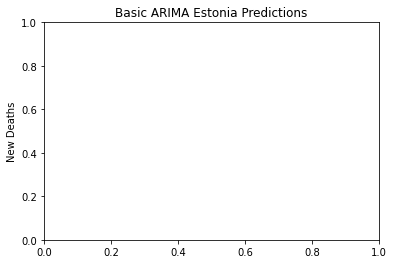

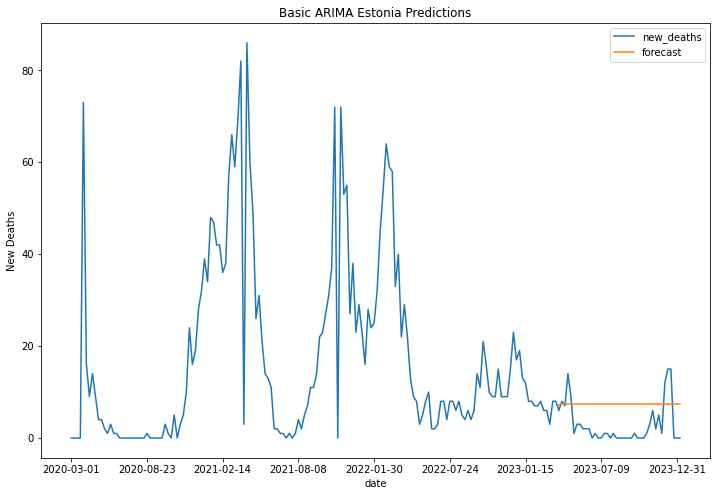

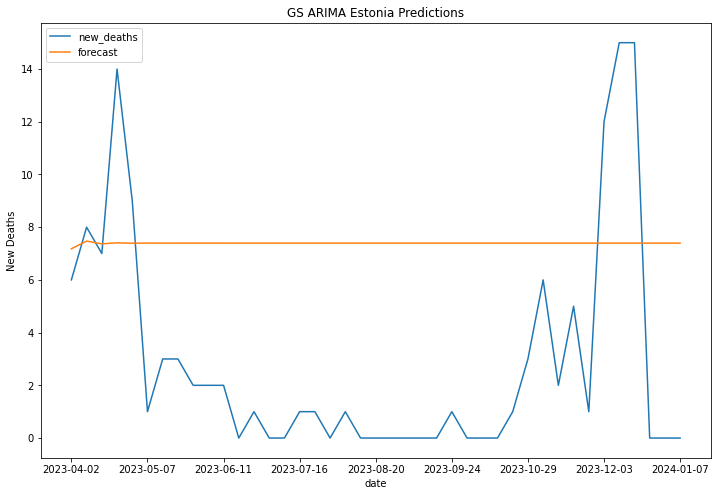

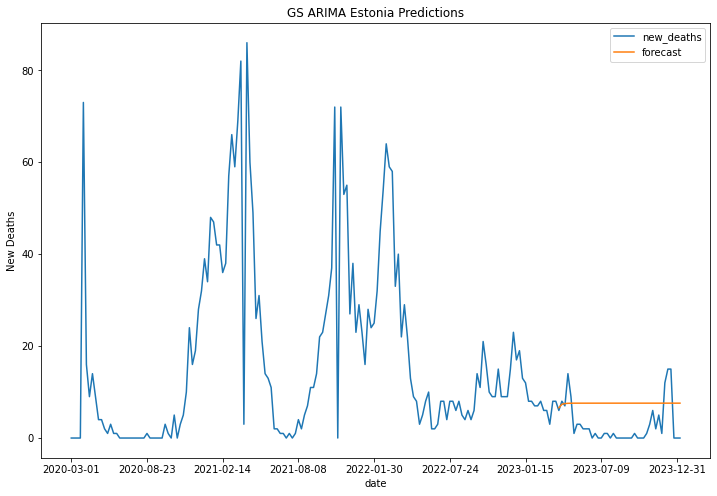

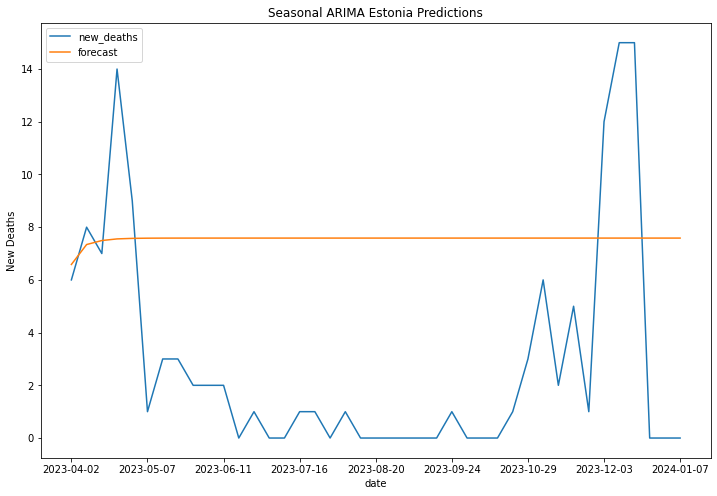

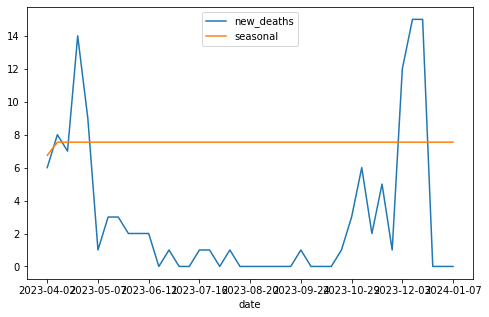

In [143]:
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(eston_train['new_deaths'],order=(1,1,1))
emodel_fit=model.fit()

eston['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)
plt.title('Basic ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston[['new_deaths','forecast']].plot(figsize=(12,8))
eston_test['forecast']=emodel_fit.predict(start=161,end=202,dynamic=True)
plt.title('Basic ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))
actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a eston',mae, mase]


results = []
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(eston_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(eston_train['new_deaths'],order=(p,1,q))
e_model_fit=model.fit()

plt.title('GS ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston[['new_deaths','forecast']].plot(figsize=(12,8))

plt.title('GS ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston_test['forecast']=e_model_fit.predict(start=161,end=202,dynamic=True)
eston_test[['new_deaths','forecast']].plot(figsize=(12,8))

actuals = eston_test['new_deaths']  
predictions = eston_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched eston',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(eston_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
eston_test['seasonal'] = pred
mae = mean_absolute_error(eston_test['new_deaths'], eston_test['seasonal'])
mase = mean_absolute_scaled_error(eston_test['new_deaths'], eston_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal eston',mae, mase]

plt.title('Seasonal ARIMA Estonia Predictions')
plt.ylabel('New Deaths')
eston_test[['new_deaths','seasonal']].plot(figsize=(8,5))

In [144]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,24.199009,3.999836
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11517D+00    |proj g|=  2.00158D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   6.519D-07   7.115D+00
  F =   7.1151625691434388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12989D+00    |proj g|=  2.46607D-01

At iterate    5    f=  7.10226D+00    |proj g|=  9.90382D-04

At iterate   10    f=  7.10112D+00    |proj g|=  6.05175D-02

At iterate   15    f=  7.09421D+00    |proj g|=  3.75888D-03

At iterate   20    f=  7.09405D+00    |proj g|=  4.26619D-03

At iterate   25    f=  7.09047D+00    |proj g|=  1.83579D-02

At iterate   30    f=  7.08551D+00    |proj g|=  2.88984D-02

At iterate   35    f=  7.08336D+00    |proj g|=  2.55827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.11625D+00    |proj g|=  2.90274D-03

At iterate   10    f=  7.11483D+00    |proj g|=  4.06284D-02

At iterate   15    f=  7.11244D+00    |proj g|=  1.37642D-02

At iterate   20    f=  7.09635D+00    |proj g|=  5.86909D-02

At iterate   25    f=  7.08959D+00    |proj g|=  1.79516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     33      1     0     0   1.030D-05   7.090D+00
  F =   7.0895754810853955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99697D+00    |proj g|=  1.94797D-01

At iterate    5    f=  6.82945D+00    |proj g|=  2.51641D-04

At iterate   10    f=  6.82942D+00    |proj g|=  4.77647D-03

At iterate   15    f=  6.82853D+00    |proj g|=  5.98360D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   4.131D-06   6.828D+00
  F =   6.8284953586512502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.82491D+00    |proj g|=  2.43496D-03

At iterate   15    f=  6.82366D+00    |proj g|=  2.70411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     25      1     0     0   6.081D-06   6.824D+00
  F =   6.8236568372488815     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99289D+00    |proj g|=  2.77321D-01

At iterate    5    f=  6.82494D+00    |proj g|=  1.08893D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  6.81703D+00    |proj g|=  3.29992D-03

At iterate   30    f=  6.81530D+00    |proj g|=  1.03041D-02

At iterate   35    f=  6.81517D+00    |proj g|=  3.12896D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   3.129D-06   6.815D+00
  F =   6.8151660222329138     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07882D+00    |proj g|=  5.75109D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  6.82225D+00    |proj g|=  1.82292D-03

At iterate   15    f=  6.82183D+00    |proj g|=  3.92075D-02

At iterate   20    f=  6.81708D+00    |proj g|=  4.61282D-03

At iterate   25    f=  6.81700D+00    |proj g|=  1.41677D-03

At iterate   30    f=  6.81652D+00    |proj g|=  2.30028D-02

At iterate   35    f=  6.81506D+00    |proj g|=  7.54667D-04

At iterate   40    f=  6.81506D+00    |proj g|=  2.42967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     48      1     0     0   2.430D-05   6.815D+00
  F =   6.8150578187537505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  6.70352D+00    |proj g|=  5.76565D-04

At iterate   10    f=  6.70292D+00    |proj g|=  1.76314D-02

At iterate   15    f=  6.70134D+00    |proj g|=  6.03055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     21      1     0     0   9.720D-06   6.701D+00
  F =   6.7013399662908100     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72184D+00    |proj g|=  2.40499D-01

At itera

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71940D+00    |proj g|=  2.39782D-01

At iterate    5    f=  6.67848D+00    |proj g|=  7.96343D-03

At iterate   10    f=  6.67844D+00    |proj g|=  6.29472D-04

At iterate   15    f=  6.67835D+00    |proj g|=  9.93863D-03

At iterate   20    f=  6.67790D+00    |proj g|=  1.97147D-03

At iterate   25    f=  6.67789D+00    |proj g|=  4.03828D-04

At iterate   30    f=  6.67779D+00    |proj g|=  4.11473D-03

At iterate   35    f=  6.67766D+00    |proj g|=  1.66256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69559D+00    |proj g|=  1.15639D-01

At iterate    5    f=  6.67900D+00    |proj g|=  1.41062D-03

At iterate   10    f=  6.67900D+00    |proj g|=  2.20487D-03

At iterate   15    f=  6.67876D+00    |proj g|=  1.84126D-02

At iterate   20    f=  6.67848D+00    |proj g|=  5.45668D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   3.982D-06   6.678D+00
  F =   6.6784758951450272     

CONVERG

 This problem is unconstrained.



At iterate   40    f=  6.67752D+00    |proj g|=  4.29488D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     46      1     0     0   2.657D-05   6.678D+00
  F =   6.6775220750970510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77013D+00    |proj g|=  2.82842D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.74607D+00    |proj g|=  4.90023D-03

At iterate   15    f=  6.74540D+00    |proj g|=  4.47713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.908D-06   6.745D+00
  F =   6.7453597859901366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74720D+00    |proj g|=  2.13909D-02

At iterate    5    f=  6.74693D+00    |proj g|=  7.95805D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.74614D+00    |proj g|=  2.47959D-04

At iterate   10    f=  6.74613D+00    |proj g|=  3.08512D-03

At iterate   15    f=  6.74554D+00    |proj g|=  1.30655D-02

At iterate   20    f=  6.74536D+00    |proj g|=  4.61160D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   4.612D-06   6.745D+00
  F =   6.7453579542216993     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.74625D+00    |proj g|=  3.13970D-04

At iterate   10    f=  6.74619D+00    |proj g|=  5.07889D-03

At iterate   15    f=  6.74596D+00    |proj g|=  3.84809D-04

At iterate   20    f=  6.74594D+00    |proj g|=  3.70043D-03

At iterate   25    f=  6.74550D+00    |proj g|=  1.12174D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   2.327D-05   6.745D+00
  F =   6.7453522674124562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72641D+00    |proj g|=  3.68291D-02

At iterate    5    f=  6.72567D+00    |proj g|=  4.43569D-04

At iterate   10    f=  6.72555D+00    |proj g|=  8.49970D-03

At iterate   15    f=  6.72404D+00    |proj g|=  1.30363D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   2.945D-06   6.724D+00
  F =   6.7237831494111147     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.71326D+00    |proj g|=  1.19631D-03

At iterate   25    f=  6.71285D+00    |proj g|=  1.09120D-02

At iterate   30    f=  6.71236D+00    |proj g|=  4.36780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     36      1     0     0   2.641D-05   6.712D+00
  F =   6.7123548034793608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.71736D+00    |proj g|=  7.60761D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.71326D+00    |proj g|=  3.47721D-04

At iterate   25    f=  6.71300D+00    |proj g|=  1.15968D-02

At iterate   30    f=  6.71238D+00    |proj g|=  1.26479D-03

At iterate   35    f=  6.71234D+00    |proj g|=  8.26268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     44      1     0     0   4.205D-06   6.712D+00
  F =   6.7123424517989747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  6.70827D+00    |proj g|=  5.03736D-03

At iterate   35    f=  6.70801D+00    |proj g|=  2.81175D-03

At iterate   40    f=  6.70799D+00    |proj g|=  3.12541D-04

At iterate   45    f=  6.70798D+00    |proj g|=  1.56836D-03

At iterate   50    f=  6.70797D+00    |proj g|=  8.98913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54      1     0     0   8.989D-05   6.708D+00
  F =   6.7079654389929626     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70438D+00    |proj g|=  1.54205D-01

At iterate    5    f=  6.68070D+00    |proj g|=  3.71382D-02

At iterate   10    f=  6.68003D+00    |proj g|=  8.72454D-04

At iterate   15    f=  6.67957D+00    |proj g|=  1.45326D-02

At iterate   20    f=  6.67452D+00    |proj g|=  1.24009D-02

At iterate   25    f=  6.67413D+00    |proj g|=  1.36874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70754D+00    |proj g|=  1.75436D-01

At iterate    5    f=  6.68010D+00    |proj g|=  3.38998D-02

At iterate   10    f=  6.67947D+00    |proj g|=  8.66265D-04

At iterate   15    f=  6.67894D+00    |proj g|=  2.39501D-02

At iterate   20    f=  6.67797D+00    |proj g|=  1.90997D-03

At iterate   25    f=  6.67786D+00    |proj g|=  7.90807D-03

At iterate   30    f=  6.67471D+00    |proj g|=  3.16124D-02

At iterate   35    f=  6.67340D+00    |proj g|=  3.23746D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  6.67339D+00    |proj g|=  9.42426D-04

At iterate   40    f=  6.67338D+00    |proj g|=  5.45494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   1.725D-05   6.673D+00
  F =   6.6733795937615232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70772D+00    |proj g|=  1.76852D-01

At iterate    5    f=  6.67975D+00    |proj g|=  2.84391D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.69174D+00    |proj g|=  2.32698D-02

At iterate   15    f=  6.69026D+00    |proj g|=  1.28334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     28      1     0     0   7.549D-05   6.690D+00
  F =   6.6902614440027151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69255D+00    |proj g|=  5.57168D-02

At iterate    5    f=  6.69013D+00    |proj g|=  3.09009D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.68903D+00    |proj g|=  2.58031D-02

At iterate   15    f=  6.68837D+00    |proj g|=  1.07866D-04

At iterate   20    f=  6.68835D+00    |proj g|=  2.50737D-03

At iterate   25    f=  6.68826D+00    |proj g|=  6.74702D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   4.809D-06   6.688D+00
  F =   6.6882579866615766     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  6.68163D+00    |proj g|=  3.84526D-02

At iterate   25    f=  6.67919D+00    |proj g|=  5.14317D-03

At iterate   30    f=  6.67893D+00    |proj g|=  7.27392D-04

At iterate   35    f=  6.67892D+00    |proj g|=  2.17003D-04

At iterate   40    f=  6.67891D+00    |proj g|=  3.59893D-03

At iterate   45    f=  6.67850D+00    |proj g|=  6.06537D-03

At iterate   50    f=  6.67841D+00    |proj g|=  9.90542D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   9.905D-05   6.678D+00
  F =   6.6784104521129963     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.68206D+00    |proj g|=  3.29438D-02

At iterate   20    f=  6.68008D+00    |proj g|=  1.51344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   6.478D-06   6.680D+00
  F =   6.6800758579672053     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68499D+00    |proj g|=  5.16512D-02

At iterate    5    f=  6.68286D+00    |proj g|=  1.63499D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72034D+00    |proj g|=  2.70258D-01

At iterate    5    f=  6.68320D+00    |proj g|=  3.28812D-03

At iterate   10    f=  6.68314D+00    |proj g|=  7.56335D-04

At iterate   15    f=  6.68282D+00    |proj g|=  1.91494D-02

At iterate   20    f=  6.67891D+00    |proj g|=  2.30647D-02

At iterate   25    f=  6.67853D+00    |proj g|=  7.81220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   5.861D-05   6.679D+00
  F =   6.6785280856916

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.68047D+00    |proj g|=  2.69564D-02

At iterate   20    f=  6.67674D+00    |proj g|=  1.55164D-02

At iterate   25    f=  6.67657D+00    |proj g|=  3.76986D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   1.737D-06   6.677D+00
  F =   6.6765746178563550     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68430D+00    |proj g|=  4.78109D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  6.67959D+00    |proj g|=  2.09412D-02

At iterate   30    f=  6.67852D+00    |proj g|=  3.98128D-03

At iterate   35    f=  6.67669D+00    |proj g|=  4.43522D-02

At iterate   40    f=  6.67340D+00    |proj g|=  5.29496D-03

At iterate   45    f=  6.67261D+00    |proj g|=  3.54746D-03

At iterate   50    f=  6.67257D+00    |proj g|=  1.05369D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.054D-03   6.673D+00
  F =   6.6725665442101212     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.69521D+00    |proj g|=  3.24469D-03

At iterate   10    f=  6.69389D+00    |proj g|=  4.99710D-02

At iterate   15    f=  6.69074D+00    |proj g|=  9.86532D-03

At iterate   20    f=  6.68886D+00    |proj g|=  3.36690D-02

At iterate   25    f=  6.67843D+00    |proj g|=  2.14782D-02

At iterate   30    f=  6.67811D+00    |proj g|=  3.44520D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     36      1     0     0   9.770D-06   6.678D+00
  F =   6.6781084105066961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70699D+00    |proj g|=  1.54089D-01

At iterate    5    f=  6.69220D+00    |proj g|=  9.05591D-03

At iterate   10    f=  6.69125D+00    |proj g|=  1.00215D-02

At iterate   15    f=  6.69087D+00    |proj g|=  7.51765D-03

At iterate   20    f=  6.69031D+00    |proj g|=  1.60521D-03

At iterate   25    f=  6.68933D+00    |proj g|=  1.56468D-02

At iterate   30    f=  6.67658D+00    |proj g|=  1.40427D-02

At iterate   35    f=  6.67578D+00    |proj g|=  2.32368D-03

At iterate   40    f=  6.67572D+00    |proj g|=  8.42186D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   10    f=  6.69047D+00    |proj g|=  1.88281D-02

At iterate   15    f=  6.69008D+00    |proj g|=  1.04109D-02

At iterate   20    f=  6.68857D+00    |proj g|=  1.49059D-02

At iterate   25    f=  6.68829D+00    |proj g|=  4.10674D-03

At iterate   30    f=  6.68662D+00    |proj g|=  1.83018D-02

At iterate   35    f=  6.67474D+00    |proj g|=  1.74922D-02

At iterate   40    f=  6.67444D+00    |proj g|=  1.50771D-03

At iterate   45    f=  6.67442D+00    |proj g|=  8.16362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     52      1     0     0   7.344D-05   6.674D+00
  F =   6.67441936475

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.68904D+00    |proj g|=  2.17245D-02

At iterate   20    f=  6.68792D+00    |proj g|=  1.42106D-03

At iterate   25    f=  6.68777D+00    |proj g|=  4.29609D-03

At iterate   30    f=  6.67839D+00    |proj g|=  1.70071D-02

At iterate   35    f=  6.67415D+00    |proj g|=  4.30564D-03

At iterate   40    f=  6.67411D+00    |proj g|=  2.62404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     47      1     0     0   6.123D-05   6.674D+00
  F =   6.6741015078603239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  6.69053D+00    |proj g|=  1.70534D-02

At iterate   15    f=  6.68985D+00    |proj g|=  1.58646D-02

At iterate   20    f=  6.68840D+00    |proj g|=  2.39819D-03

At iterate   25    f=  6.68833D+00    |proj g|=  4.98940D-03

At iterate   30    f=  6.68443D+00    |proj g|=  7.78251D-02

At iterate   35    f=  6.66665D+00    |proj g|=  7.90385D-02

At iterate   40    f=  6.66179D+00    |proj g|=  1.40009D-02

At iterate   45    f=  6.66123D+00    |proj g|=  3.10816D-03

At iterate   50    f=  6.66102D+00    |proj g|=  8.80827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60   

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

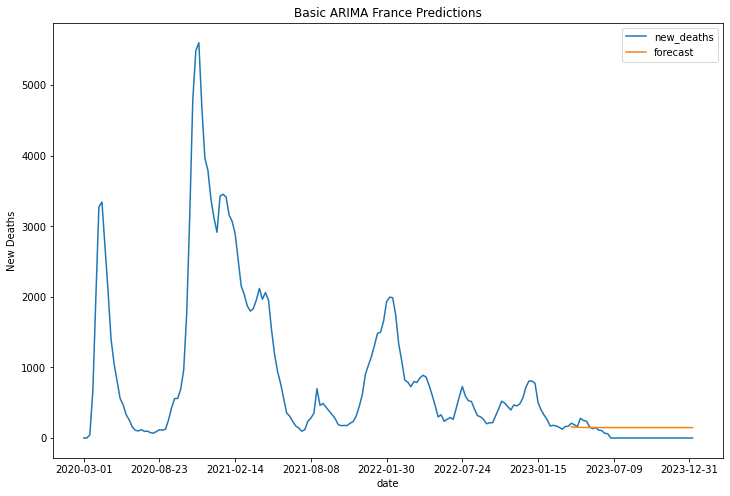

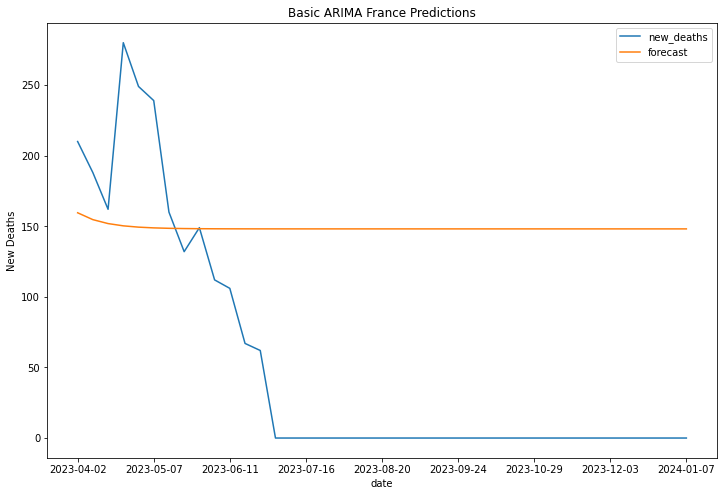

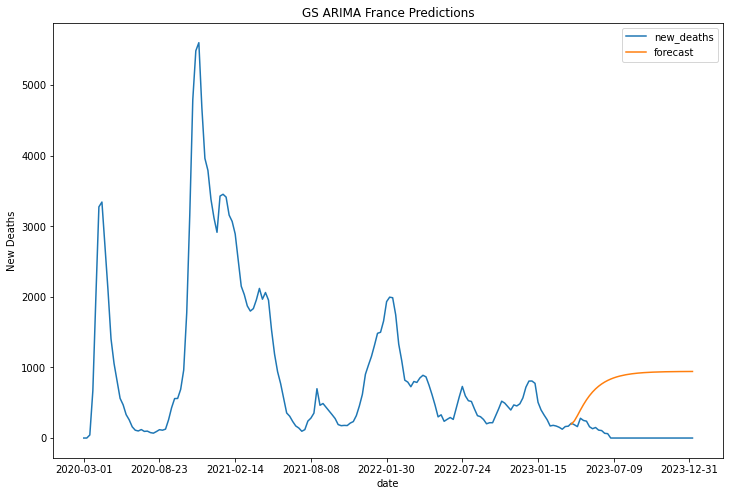

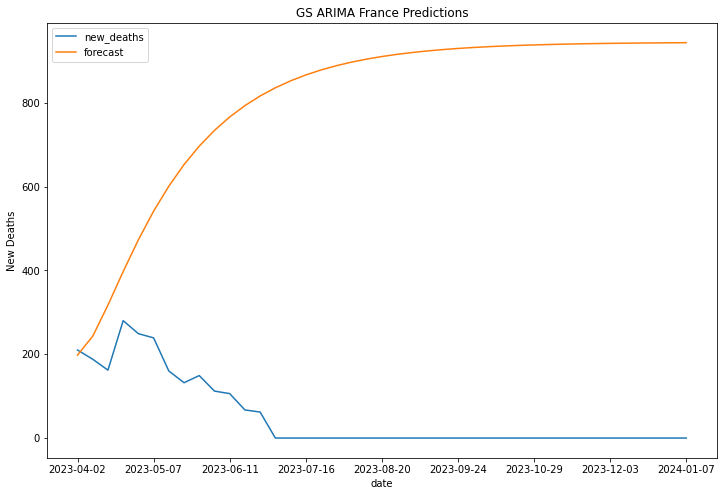

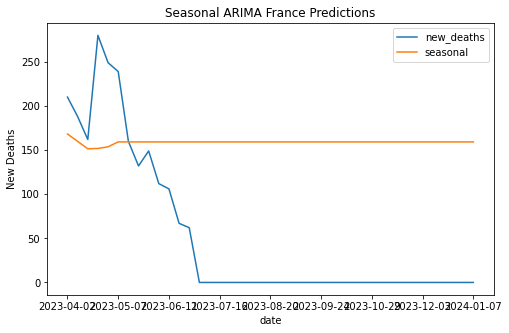

In [145]:
# franc 
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(franc_train['new_deaths'],order=(1,1,1))
fmodel_fit=model.fit()


franc['forecast']=fmodel_fit.predict(start=161,end=202,dynamic=True)
franc[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA France Predictions')
plt.ylabel('New Deaths')

franc_test['forecast']=fmodel_fit.predict(start=161,end=202,dynamic=True)
franc_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA France Predictions')
plt.ylabel('New Deaths')

actuals = franc_test['new_deaths']  
predictions = franc_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a franc',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(franc_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(franc_train['new_deaths'],order=(p,1,q))
f_model_fit=model.fit()

franc['forecast']=f_model_fit.predict(start=161,end=202,dynamic=True)
franc[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA France Predictions')
plt.ylabel('New Deaths')
franc_test['forecast']=f_model_fit.predict(start=161,end=202,dynamic=True)
franc_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA France Predictions')
plt.ylabel('New Deaths')

actuals = franc_test['new_deaths']  
predictions = franc_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched franc',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(franc_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(franc_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
franc_test['seasonal'] = pred
mae = mean_absolute_error(franc_test['new_deaths'], franc_test['seasonal'])
mase = mean_absolute_scaled_error(franc_test['new_deaths'], franc_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal franc',mae, mase]


franc_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA France Predictions')
plt.ylabel('New Deaths')

In [146]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,24.199009,3.999836
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110
6,base a franc,117.930514,9.827543
7,grid searched franc,753.078087,62.756507
8,gs seasonal franc,126.121873,10.510156


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18306D+00    |proj g|=  5.11343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   2.220D-09   6.183D+00
  F =   6.1830457905579177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.16033D+00    |proj g|=  1.43905D-02

At iterate   10    f=  6.15995D+00    |proj g|=  3.43943D-03

At iterate   15    f=  6.15587D+00    |proj g|=  2.35046D-02

At iterate   20    f=  6.15022D+00    |proj g|=  1.73166D-02

At iterate   25    f=  6.14989D+00    |proj g|=  7.48832D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   7.488D-06   6.150D+00
  F =   6.1498872741874289     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05951D+00    |proj g|=  2.45344D-01

At iterate    5    f=  6.02054D+00    |proj g|=  1.88686D-03

At iterate   10    f=  6.02022D+00    |proj g|=  9.31849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   1.581D-06   6.020D+00
  F =   6.0201755378986910     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.01742D+00    |proj g|=  3.80244D-02

At iterate   15    f=  6.01511D+00    |proj g|=  4.50111D-04

At iterate   20    f=  6.01476D+00    |proj g|=  5.78534D-03

At iterate   25    f=  6.01453D+00    |proj g|=  5.49605D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   5.496D-07   6.015D+00
  F =   6.0145308855736577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.00914D+00    |proj g|=  1.41764D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   9.438D-06   6.009D+00
  F =   6.0091370083341706     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.10659D+00    |proj g|=  4.43955D-01

At iterate    5    f=  6.00961D+00    |proj g|=  2.37025D-03

At iterate   10    f=  6.00938D+00    |proj g|=  9.40424D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.00822D+00    |proj g|=  3.90761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     39      1     0     0   1.440D-05   6.008D+00
  F =   6.0082220035526683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95749D+00    |proj g|=  8.82431D-02

At iterate    5    f=  5.95361D+00    |proj g|=  1.90299D-03

At iterate   10    f=  5.95329D+00    |proj g|=  8.66011D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94995D+00    |proj g|=  6.60063D-02

At iterate    5    f=  5.94736D+00    |proj g|=  5.17584D-04

At iterate   10    f=  5.94718D+00    |proj g|=  1.09349D-02

At iterate   15    f=  5.94668D+00    |proj g|=  6.33430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   3.194D-07   5.947D+00
  F =   5.9466815721790294     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.92523D+00    |proj g|=  1.48351D-02

At iterate   20    f=  5.92329D+00    |proj g|=  7.99614D-04

At iterate   25    f=  5.92328D+00    |proj g|=  6.85954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     31      1     0     0   4.194D-05   5.923D+00
  F =   5.9232817226592260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92951D+00    |proj g|=  5.80843D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98367D+00    |proj g|=  2.88023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   6.162D-05   5.984D+00
  F =   5.9836645868749532     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.96680D+00    |proj g|=  9.02354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   4.699D-06   5.967D+00
  F =   5.9667233153986858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96366D+00    |proj g|=  4.39514D-02

At iterate    5    f=  5.96155D+00    |proj g|=  5.20866D-04

At iterate   10    f=  5.96144D+00    |proj g|=  7.20271D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.96084D+00    |proj g|=  6.73440D-03

At iterate   20    f=  5.96022D+00    |proj g|=  7.71404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   2.236D-06   5.960D+00
  F =   5.9602183158391799     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96276D+00    |proj g|=  5.32729D-02

At iterate    5    f=  5.96116D+00    |proj g|=  7.49756D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97346D+00    |proj g|=  4.01003D-02

At iterate    5    f=  5.97222D+00    |proj g|=  4.59892D-04

At iterate   10    f=  5.97221D+00    |proj g|=  2.51599D-03

At iterate   15    f=  5.97198D+00    |proj g|=  7.92481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   2.678D-06   5.972D+00
  F =   5.9719160224462629     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.95729D+00    |proj g|=  1.53235D-02

At iterate   25    f=  5.95711D+00    |proj g|=  1.23432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   2.568D-05   5.957D+00
  F =   5.9571072373091329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96132D+00    |proj g|=  6.44963D-02

At iterate    5    f=  5.95851D+00    |proj g|=  1.47049D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  5.95682D+00    |proj g|=  9.10353D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     31      1     0     0   2.517D-05   5.957D+00
  F =   5.9568154042900394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96668D+00    |proj g|=  1.20521D-01

At iterate    5    f=  5.95792D+00    |proj g|=  6.40229D-03

At iterate   10    f=  5.95786D+00    |proj g|=  2.14316D-03

At itera

 This problem is unconstrained.



At iterate   35    f=  5.95698D+00    |proj g|=  3.35928D-04

At iterate   40    f=  5.95698D+00    |proj g|=  6.68375D-04

At iterate   45    f=  5.95697D+00    |proj g|=  7.48519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     53      1     0     0   1.949D-05   5.957D+00
  F =   5.9569710735856303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96099D+00    |proj g|=  1.13417D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92924D+00    |proj g|=  5.03766D-02

At iterate    5    f=  5.92533D+00    |proj g|=  1.22171D-02

At iterate   10    f=  5.92511D+00    |proj g|=  2.22222D-03

At iterate   15    f=  5.92417D+00    |proj g|=  2.83135D-02

At iterate   20    f=  5.92256D+00    |proj g|=  3.90368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   5.761D-05   5.923D+00
  F =   5.9225641012479047     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.93774D+00    |proj g|=  3.89844D-02

At iterate   10    f=  5.93348D+00    |proj g|=  2.28946D-03

At iterate   15    f=  5.93337D+00    |proj g|=  1.25207D-03

At iterate   20    f=  5.93272D+00    |proj g|=  1.22695D-02

At iterate   25    f=  5.93172D+00    |proj g|=  1.28941D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   3.384D-06   5.932D+00
  F =   5.9317125488995250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.92361D+00    |proj g|=  2.04032D-02

At iterate   25    f=  5.92209D+00    |proj g|=  2.49816D-03

At iterate   30    f=  5.92209D+00    |proj g|=  9.84024D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     37      1     0     0   4.360D-06   5.922D+00
  F =   5.9220893407366582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93152D+00    |proj g|=  7.39487D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.92543D+00    |proj g|=  2.88743D-02

At iterate   10    f=  5.92470D+00    |proj g|=  2.24638D-03

At iterate   15    f=  5.92449D+00    |proj g|=  5.54911D-03

At iterate   20    f=  5.92441D+00    |proj g|=  3.69046D-03

At iterate   25    f=  5.92333D+00    |proj g|=  1.71559D-02

At iterate   30    f=  5.92195D+00    |proj g|=  2.08550D-03

At iterate   35    f=  5.92192D+00    |proj g|=  1.70620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     42      1     0     0   7.094D-05   5.922D+00
  F =   5.9219245031890608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96845D+00    |proj g|=  6.01963D-02

At iterate    5    f=  5.96650D+00    |proj g|=  2.52309D-04

At iterate   10    f=  5.96646D+00    |proj g|=  3.04482D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   1.866D-05   5.966D+00
  F =   5.9664513025331454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.95299D+00    |proj g|=  4.31886D-03

At iterate   20    f=  5.95259D+00    |proj g|=  1.12848D-03

At iterate   25    f=  5.95259D+00    |proj g|=  2.03437D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     35      1     0     0   1.968D-05   5.953D+00
  F =   5.9525919531380449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95659D+00    |proj g|=  8.35840D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.95304D+00    |proj g|=  6.22860D-03

At iterate   20    f=  5.95278D+00    |proj g|=  3.51624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.444D-06   5.953D+00
  F =   5.9527807741179508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96485D+00    |proj g|=  1.64566D-01

At iterate    5    f=  5.95305D+00    |proj g|=  2.63764D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52249D+00    |proj g|=  1.22763D+00

At iterate    5    f=  5.95854D+00    |proj g|=  2.33698D-02

At iterate   10    f=  5.95296D+00    |proj g|=  2.22657D-04

At iterate   15    f=  5.95020D+00    |proj g|=  6.50352D-02

At iterate   20    f=  5.94410D+00    |proj g|=  2.88736D-02

At iterate   25    f=  5.94349D+00    |proj g|=  8.48829D-04

At iterate   30    f=  5.94349D+00    |proj g|=  6.40435D-04

At iterate   35    f=  5.94345D+00    |proj g|=  2.67650D-03

At iterate   40    f=  5.94345D+00    |proj g|=  4.25533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.95353D+00    |proj g|=  1.78706D-03

At iterate   35    f=  5.95333D+00    |proj g|=  3.72681D-03

At iterate   40    f=  5.95330D+00    |proj g|=  3.45917D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     43      1     0     0   3.459D-05   5.953D+00
  F =   5.9533005815446796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52012D+00    |proj g|=  1.22281D+00

At iter

 This problem is unconstrained.



At iterate   30    f=  5.94781D+00    |proj g|=  4.65478D-04

At iterate   35    f=  5.94774D+00    |proj g|=  3.38184D-03

At iterate   40    f=  5.94750D+00    |proj g|=  1.05617D-03

At iterate   45    f=  5.94749D+00    |proj g|=  6.46528D-04

At iterate   50    f=  5.94749D+00    |proj g|=  3.96478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   3.965D-04   5.947D+00
  F =   5.9474869975716649     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.


At iterate   10    f=  5.95300D+00    |proj g|=  3.29379D-03

At iterate   15    f=  5.95298D+00    |proj g|=  1.73361D-03

At iterate   20    f=  5.95296D+00    |proj g|=  3.88624D-04

At iterate   25    f=  5.95290D+00    |proj g|=  9.80378D-03

At iterate   30    f=  5.95184D+00    |proj g|=  8.62155D-03

At iterate   35    f=  5.94936D+00    |proj g|=  3.74896D-03

At iterate   40    f=  5.94792D+00    |proj g|=  1.75391D-03

At iterate   45    f=  5.94787D+00    |proj g|=  4.06071D-03

At iterate   50    f=  5.94736D+00    |proj g|=  9.13670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54    

 This problem is unconstrained.



At iterate   40    f=  5.95081D+00    |proj g|=  5.89272D-03

At iterate   45    f=  5.94990D+00    |proj g|=  1.38870D-03

At iterate   50    f=  5.94969D+00    |proj g|=  4.39068D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   4.391D-03   5.950D+00
  F =   5.9496876041237918     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93870D+00    |proj g|=  1.08088D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.93214D+00    |proj g|=  4.08973D-02

At iterate   10    f=  5.92250D+00    |proj g|=  1.99502D-02

At iterate   15    f=  5.92087D+00    |proj g|=  8.97226D-04

At iterate   20    f=  5.92038D+00    |proj g|=  1.87219D-02

At iterate   25    f=  5.91883D+00    |proj g|=  5.53976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   5.588D-05   5.919D+00
  F =   5.9188228242270657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.92400D+00    |proj g|=  5.18536D-03

At iterate   20    f=  5.91787D+00    |proj g|=  6.00729D-02

At iterate   25    f=  5.91397D+00    |proj g|=  2.83336D-03

At iterate   30    f=  5.91391D+00    |proj g|=  2.88641D-03

At iterate   35    f=  5.91304D+00    |proj g|=  3.59272D-02

At iterate   40    f=  5.91238D+00    |proj g|=  1.24623D-03

At iterate   45    f=  5.91238D+00    |proj g|=  4.85118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     54      1     0     0   4.562D-05   5.912D+00
  F =   5.9123754586529094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  5.90889D+00    |proj g|=  2.25681D-03

At iterate   15    f=  5.90872D+00    |proj g|=  2.18958D-03

At iterate   20    f=  5.90863D+00    |proj g|=  2.92255D-03

At iterate   25    f=  5.90780D+00    |proj g|=  3.87593D-02

At iterate   30    f=  5.90540D+00    |proj g|=  4.07980D-03

At iterate   35    f=  5.90532D+00    |proj g|=  1.00284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     41      1     0     0   1.003D-05   5.905D+00
  F =   5.9053230571358366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.90961D+00    |proj g|=  1.14061D-03

At iterate   15    f=  5.90955D+00    |proj g|=  4.94058D-03

At iterate   20    f=  5.90875D+00    |proj g|=  1.74052D-02

At iterate   25    f=  5.90626D+00    |proj g|=  6.09535D-03

At iterate   30    f=  5.90624D+00    |proj g|=  1.93778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   1.938D-05   5.906D+00
  F =   5.9062413178662698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   20    f=  5.90863D+00    |proj g|=  3.00702D-03

At iterate   25    f=  5.90837D+00    |proj g|=  7.15503D-03

At iterate   30    f=  5.90831D+00    |proj g|=  5.95159D-03

At iterate   35    f=  5.90711D+00    |proj g|=  1.65480D-02

At iterate   40    f=  5.90648D+00    |proj g|=  3.37355D-03

At iterate   45    f=  5.90622D+00    |proj g|=  3.25016D-03

At iterate   50    f=  5.90618D+00    |proj g|=  3.05262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   3.053D-03   5.906D+00
  F =   5.9061790472375346     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

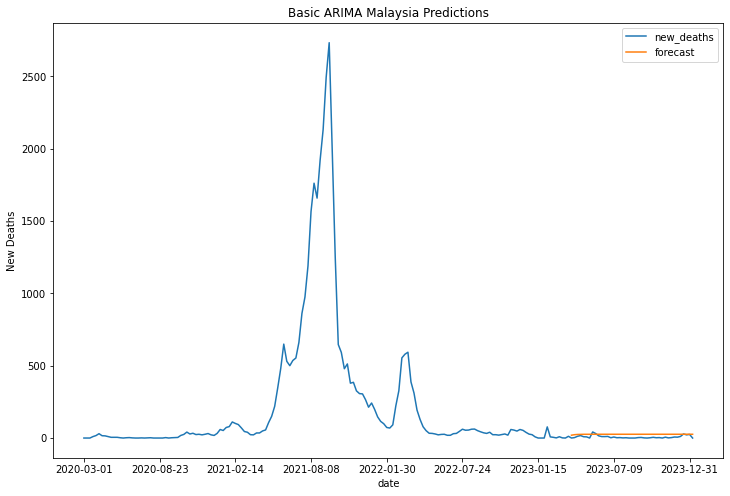

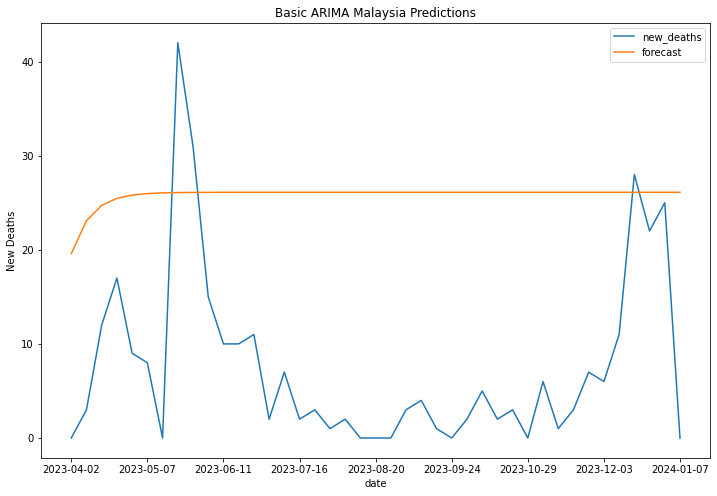

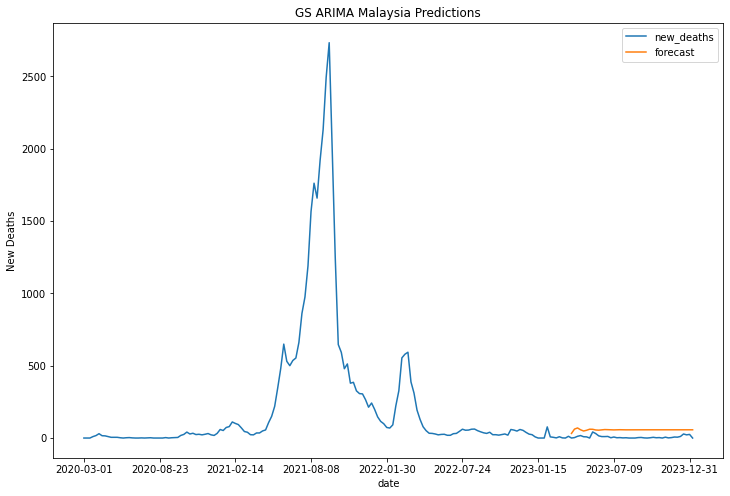

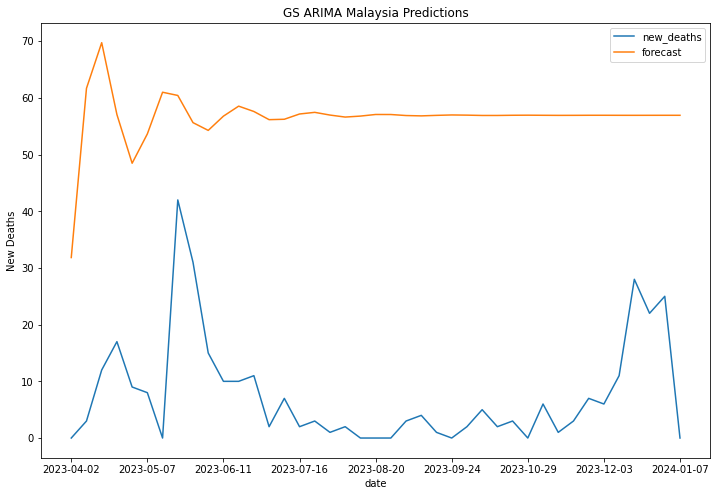

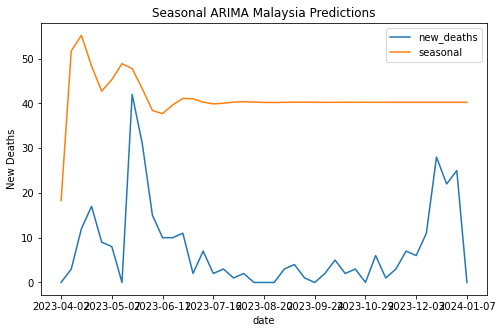

In [147]:
#malaysia
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(malay_train['new_deaths'],order=(1,1,1))
mmodel_fit=model.fit()


malay['forecast']=mmodel_fit.predict(start=161,end=202,dynamic=True)
malay[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
malay_test['forecast']=mmodel_fit.predict(start=161,end=202,dynamic=True)
malay_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
actuals = malay_test['new_deaths']  
predictions = malay_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a malay',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(malay_train['new_deaths'],order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(malay_train['new_deaths'],order=(p,1,q))
m_model_fit=model.fit()

malay['forecast']=m_model_fit.predict(start=161,end=202,dynamic=True)
malay[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')
malay_test['forecast']=m_model_fit.predict(start=161,end=202,dynamic=True)
malay_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')

actuals = malay_test['new_deaths']  
predictions = malay_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched malay',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(malay_train['new_deaths'],order=(p,1,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(malay_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
malay_test['seasonal'] = pred
mae = mean_absolute_error(malay_test['new_deaths'], malay_test['seasonal'])
mase = mean_absolute_scaled_error(malay_test['new_deaths'], malay_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal malay',mae, mase]


malay_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Malaysia Predictions')
plt.ylabel('New Deaths')

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38147D+00    |proj g|=  8.88178D-11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.882D-11   7.381D+00
  F =   7.3814663332754584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.5

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     92      1     0     0   8.434D-04   7.171D+00
  F =   7.1707565061469527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36501D+00    |proj g|=  8.11434D-03

At iterate    5    f=  7.36283D+00    |proj g|=  4.29405D-02

At iterate   10    f=  7.25451D+00    |proj g|=  1.54398D-01

At iterate   15    f=  7.20723D+00    |proj g|=  6.39545D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  7.20686D+00    |proj g|=  1.83050D-04

At iterate   40    f=  7.20686D+00    |proj g|=  1.13657D-04

At iterate   45    f=  7.20686D+00    |proj g|=  1.79638D-04

At iterate   50    f=  7.20685D+00    |proj g|=  2.01696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     71      1     0     0   2.017D-04   7.207D+00
  F =   7.2068541812962899     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  7.19733D+00    |proj g|=  8.92081D-02

At iterate   30    f=  7.19396D+00    |proj g|=  5.82525D-02

At iterate   35    f=  7.18797D+00    |proj g|=  3.68118D-02

At iterate   40    f=  7.18332D+00    |proj g|=  8.31507D-03

At iterate   45    f=  7.18330D+00    |proj g|=  2.85375D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


  ys=-2.342E-06  -gs= 2.315E-06 BFGS update SKIPPED
  ys=-1.985E-07  -gs= 3.459E-06 BFGS update SKIPPED

At iterate   50    f=  7.18329D+00    |proj g|=  2.26089D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    189      3     2     0   2.261D-02   7.183D+00
  F =   7.1832857744932301     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39109D+00    |proj g|=  1.14483D+00

At iterate    5    f=  6.96

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.91705D+00    |proj g|=  2.13689D-03

At iterate   15    f=  6.60639D+00    |proj g|=  1.27432D-02

At iterate   20    f=  6.59421D+00    |proj g|=  1.93247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   1.932D-05   6.594D+00
  F =   6.5942118694007537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39109D+00    |proj g|=  1.14483D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.91893D+00    |proj g|=  7.71068D-03

At iterate   10    f=  6.91110D+00    |proj g|=  2.80031D-03

At iterate   15    f=  6.61543D+00    |proj g|=  1.29199D-02

At iterate   20    f=  6.56705D+00    |proj g|=  8.51991D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     32      1     0     0   5.988D-06   6.567D+00
  F =   6.5670473531843143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.59846D+00    |proj g|=  5.09095D-02

At iterate   20    f=  6.53916D+00    |proj g|=  5.69827D-03

At iterate   25    f=  6.53894D+00    |proj g|=  1.23143D-02

At iterate   30    f=  6.53439D+00    |proj g|=  3.13933D-02

At iterate   35    f=  6.53377D+00    |proj g|=  5.92519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     62      1     0     0   3.483D-06   6.534D+00
  F =   6.5337703157352705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     65      2     0     0   1.975D-01   6.617D+00
  F =   6.6167954178846333     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45887D+00    |proj g|=  1.57542D+00

At iterate    5    f=  6.73252D+00    |proj g|=  1.15393D-02

At iterate   10    f=  6.72412D+00    |proj g|=  9.13224D-03

At iterate   15    f=  6.51340D+00    |proj g|=  5.08052D-01

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.21462D+00    |proj g|=  4.24430D-02

At iterate   35    f=  6.21154D+00    |proj g|=  5.26572D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     62      1     0     0   9.872D-06   6.211D+00
  F =   6.2114536727918965     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45887D+00    |proj g|=  1.57542D+00

At iterate    5    f=  6.72342D+00    |proj g|=  7.99159D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     59      1     1     0   2.359D-06   6.272D+00
  F =   6.2719700203850097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21337D+00    |proj g|=  1.01936D+00

At iterate    5    f=  6.72014D+00    |proj g|=  1.17840D-02

At iterate   10    f=  6.71591D+00    |proj g|=  3.64996D-03

At iterate   15    f=  6.61068D+00    |proj g|=  1.39880D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.72099D+00    |proj g|=  1.87431D-02

At iterate   10    f=  6.71640D+00    |proj g|=  3.79603D-03

At iterate   15    f=  6.62865D+00    |proj g|=  3.73287D-02

At iterate   20    f=  6.37568D+00    |proj g|=  4.20160D-02

At iterate   25    f=  6.25780D+00    |proj g|=  8.78814D-02

At iterate   30    f=  6.24615D+00    |proj g|=  2.08287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   6.371D-06   6.246D+00
  F =   6.2461363765969562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  6.48308D+00    |proj g|=  2.05911D-03

At iterate   25    f=  6.47954D+00    |proj g|=  2.05217D-02

At iterate   30    f=  6.30857D+00    |proj g|=  4.87621D-02

At iterate   35    f=  6.30542D+00    |proj g|=  8.29241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     84      1     0     0   6.358D-03   6.305D+00
  F =   6.3053756354307824     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.21323D+00    |proj g|=  1.02073D+00

At iterate    5    f=  6.72049D+00    |proj g|=  8.65745D-03

At iterate   10    f=  6.71583D+00    |proj g|=  2.94004D-03

At iterate   15    f=  6.42027D+00    |proj g|=  1.16551D-01

At iterate   20    f=  6.30901D+00    |proj g|=  2.03760D-02

At iterate   25    f=  6.26832D+00    |proj g|=  1.56647D-01

At iterate   30    f=  6.24756D+00    |proj g|=  4.25637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


LinAlgError: LU decomposition error.

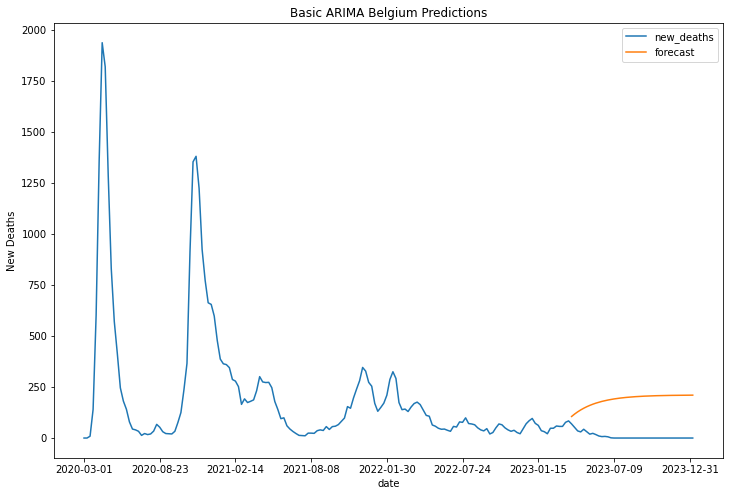

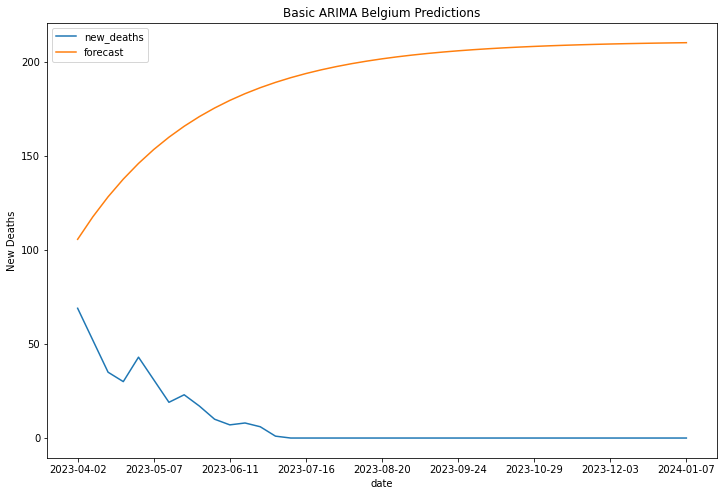

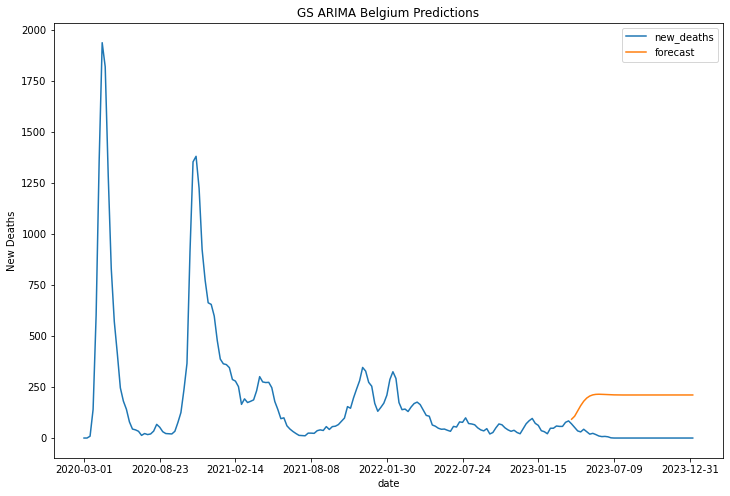

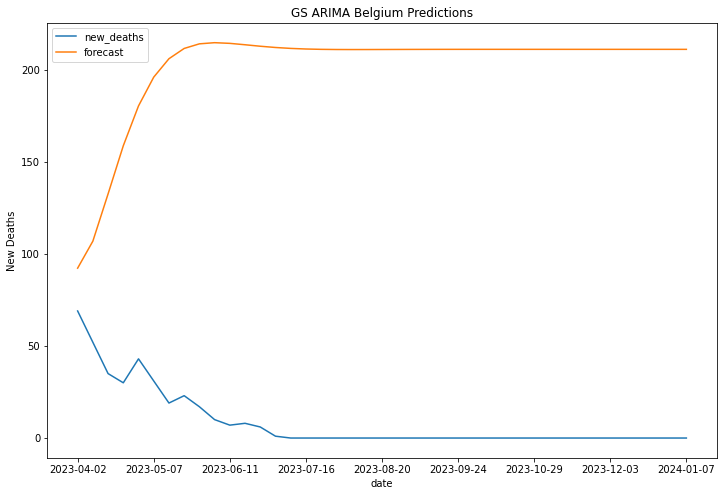

In [149]:
#belgi
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(belgi_train['new_deaths'],order=(1,0,1))
bmodel_fit=model.fit()


belgi['forecast']=bmodel_fit.predict(start=161,end=202,dynamic=True)
belgi[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
belgi_test['forecast']=bmodel_fit.predict(start=161,end=202,dynamic=True)
belgi_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
actuals = belgi_test['new_deaths']  
predictions = belgi_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a belgi',mae, mase]


results = []
for p in range(0,3):
    for q in range(0,3):
        model=ARIMA(belgi_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(belgi_train['new_deaths'],order=(p,0,q))
b_model_fit=model.fit()

belgi['forecast']=b_model_fit.predict(start=161,end=202,dynamic=True)
belgi[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Belgium Predictions')
plt.ylabel('New Deaths')
belgi_test['forecast']=b_model_fit.predict(start=161,end=202,dynamic=True)
belgi_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Belgium Predictions')
plt.ylabel('New Deaths')

actuals = belgi_test['new_deaths']  
predictions = belgi_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched belgi',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm
if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(belgi_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(belgi_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
belgi_test['seasonal'] = pred
mae = mean_absolute_error( belgi_test['new_deaths'], belgi_test['seasonal'])
mase = mean_absolute_scaled_error(belgi_test['new_deaths'], belgi_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal belgi',mae, mase]


belgi_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Belgium Predictions')
plt.ylabel('New Deaths')

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35680D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.357D+00
  F =   8.3567983780796578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32517D+00    |proj g|=  4.05509D-02

At iterate    5    f=  8.32115D+00    |proj g|=  2.17881D-02

At iterate   10    f=  8.31140D+00    |proj g|=  1.20417D-02

At iterate   15    f=  8.30651D+00    |proj g|=  2.01451D-03

At iterate   20    f=  8.30560D+00    |proj g|=  2.18830D-03

At iterate   25    f=  8.30544D+00    |proj g|=  2.34396D-04
  ys=-7.752E-03  -gs= 6.617E-04 BFGS update SKIPPED

At iterate   30    f=  8.30454D+00    |proj g|=  4.27960D-04

At iterate   35    f=  8.30219D+00    |proj g|=  1.33419D-02

At iterate   40    f=  8.30111D+00    |proj g|=  1.88689D-03

At iterate   45    f=  8.30110D+00    |proj g|=  4.96534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32775D+00    |proj g|=  6.71928D-02

At iterate    5    f=  8.31751D+00    |proj g|=  2.55501D-02

At iterate   10    f=  8.31008D+00    |proj g|=  5.23219D-04

At iterate   15    f=  8.30870D+00    |proj g|=  2.80110D-03

At iterate   20    f=  8.30784D+00    |proj g|=  3.02241D-03

At iterate   25    f=  8.30772D+00    |proj g|=  1.67884D-03

At iterate   30    f=  8.30744D+00    |proj g|=  1.68730D-03

At iterate   35    f=  8.30728D+00    |proj g|=  1.34047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     59      1     0     0   2.173D-03   8.299D+00
  F =   8.2991930246742811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31845D+00    |proj g|=  5.08119D-02

At iterate    5    f=  8.31304D+00    |proj g|=  1.07053D-02

At iterate   10    f=  8.30212D+00    |proj g|=  4.65863D-03

At iterate   15    f=  8.30163D+00    |proj g|=  3.45501D-03

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  8.29521D+00    |proj g|=  8.93735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     80      2     0     0   8.937D-05   8.295D+00
  F =   8.2952106986319976     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32216D+00    |proj g|=  4.13480D-02

At iterate    5    f=  8.32038D+00    |proj g|=  7.25358D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  8.30044D+00    |proj g|=  4.38618D-04

At iterate   40    f=  8.30039D+00    |proj g|=  4.18542D-03

At iterate   45    f=  8.29977D+00    |proj g|=  1.33231D-02
  ys=-2.320E-01  -gs= 8.350E-03 BFGS update SKIPPED

At iterate   50    f=  8.29593D+00    |proj g|=  9.59027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     94      2     1     0   9.590D-03   8.296D+00
  F =   8.2959282288335530     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0   


 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


At iterate   15    f=  8.30238D+00    |proj g|=  6.75308D-04

At iterate   20    f=  8.30212D+00    |proj g|=  3.79171D-03

At iterate   25    f=  8.30096D+00    |proj g|=  4.61451D-03

At iterate   30    f=  8.30019D+00    |proj g|=  9.33555D-04

At iterate   35    f=  8.30016D+00    |proj g|=  1.61366D-03

At iterate   40    f=  8.29991D+00    |proj g|=  6.90494D-03

At iterate   45    f=  8.29923D+00    |proj g|=  1.77601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     68      1     0     0   1.782D-03   8.299D+00
  F =   8.2992271561294810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32446D+00    |proj g|=  3.16738D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   7.863D-05   8.324D+00
  F =   8.3240171127759108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.30658D+00    |proj g|=  1.81228D-02

At iterate   10    f=  8.30113D+00    |proj g|=  5.28339D-03

At iterate   15    f=  8.29890D+00    |proj g|=  2.81231D-03

At iterate   20    f=  8.29856D+00    |proj g|=  3.31777D-04

At iterate   25    f=  8.29849D+00    |proj g|=  7.61211D-04

At iterate   30    f=  8.29801D+00    |proj g|=  6.75446D-03

At iterate   35    f=  8.29340D+00    |proj g|=  4.54377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     54      1     0     0   7.236D-04   8.293D+00
  F =   8.2934001205450709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31453D+00    |proj g|=  4.90143D-02

At iterate    5    f=  8.31211D+00    |proj g|=  1.02186D-04

At iterate   10    f=  8.31210D+00    |proj g|=  1.75837D-03

At iterate   15    f=  8.31163D+00    |proj g|=  2.00307D-02

At iterate   20    f=  8.30909D+00    |proj g|=  4.17942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.102D-05   8.309D+00
  F =   8.3090723108060569     

CONVERG

 This problem is unconstrained.



At iterate   20    f=  8.29801D+00    |proj g|=  6.00810D-03

At iterate   25    f=  8.29687D+00    |proj g|=  7.14986D-03

At iterate   30    f=  8.29636D+00    |proj g|=  1.40684D-03

At iterate   35    f=  8.29633D+00    |proj g|=  1.52283D-03

At iterate   40    f=  8.29613D+00    |proj g|=  4.40301D-03

At iterate   45    f=  8.29525D+00    |proj g|=  1.28942D-02

At iterate   50    f=  8.29500D+00    |proj g|=  7.34708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   7.347D-04   8.295D+00
  F =   8.2949974993757642     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.29826D+00    |proj g|=  4.06824D-04

At iterate   25    f=  8.29821D+00    |proj g|=  9.05255D-05

At iterate   30    f=  8.29756D+00    |proj g|=  1.88325D-02

At iterate   35    f=  8.29706D+00    |proj g|=  1.14368D-02

At iterate   40    f=  8.29604D+00    |proj g|=  1.95079D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     74      1     0     0   3.979D-04   8.296D+00
  F =   8.2958218199343516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


At iterate   25    f=  8.29646D+00    |proj g|=  9.21915D-05

At iterate   30    f=  8.29637D+00    |proj g|=  1.40642D-02

At iterate   35    f=  8.29481D+00    |proj g|=  5.76023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     62      1     0     0   5.760D-03   8.295D+00
  F =   8.2948069474211827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32112D+00    |proj g|=  7.66495D-02

At iterate    5    f=  8.31577D+00    |proj g|=  3.10241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   3.102D-05   8.316D+00
  F =   8.3157731434097215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   40    f=  8.29602D+00    |proj g|=  1.02500D-03
  ys=-3.569E-03  -gs= 4.714E-04 BFGS update SKIPPED

At iterate   45    f=  8.29577D+00    |proj g|=  6.92806D-03

At iterate   50    f=  8.29570D+00    |proj g|=  1.95032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     88      2     1     0   1.950D-04   8.296D+00
  F =   8.2957008609558134     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.28399D+00    |proj g|=  5.13223D-03

At iterate   25    f=  8.28381D+00    |proj g|=  8.04619D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     32      1     0     0   8.046D-06   8.284D+00
  F =   8.2838124352333331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30240D+00    |proj g|=  1.30798D-01

At iterate    5    f=  8.28574D+00    |proj g|=  3.76247D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.28385D+00    |proj g|=  1.86301D-04

At iterate   25    f=  8.28385D+00    |proj g|=  1.94972D-04

At iterate   30    f=  8.28373D+00    |proj g|=  3.26384D-03

At iterate   35    f=  8.28316D+00    |proj g|=  9.62668D-03

At iterate   40    f=  8.28310D+00    |proj g|=  5.96174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   3.410D-05   8.283D+00
  F =   8.2830976283161561     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.


At iterate   20    f=  8.28314D+00    |proj g|=  3.76012D-03

At iterate   25    f=  8.28237D+00    |proj g|=  4.43656D-04

At iterate   30    f=  8.28216D+00    |proj g|=  1.41231D-03

At iterate   35    f=  8.28204D+00    |proj g|=  5.95320D-04

At iterate   40    f=  8.28197D+00    |proj g|=  1.43066D-04

At iterate   45    f=  8.28193D+00    |proj g|=  8.47073D-04

At iterate   50    f=  8.28185D+00    |proj g|=  1.25505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     75      1     0     0   1.255D-03   8.282D+00
  F =   8.2818450168348292     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.28369D+00    |proj g|=  4.68872D-03

At iterate   25    f=  8.28362D+00    |proj g|=  1.41921D-03

At iterate   30    f=  8.28360D+00    |proj g|=  5.38599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   5.386D-05   8.284D+00
  F =   8.2835963477750028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.32251D+00    |proj g|=  1.70513D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  8.28413D+00    |proj g|=  5.23610D-03

At iterate   10    f=  8.28384D+00    |proj g|=  3.45738D-04

At iterate   15    f=  8.28383D+00    |proj g|=  3.12702D-04

At iterate   20    f=  8.28374D+00    |proj g|=  2.76338D-03

At iterate   25    f=  8.28358D+00    |proj g|=  2.05623D-03

At iterate   30    f=  8.28357D+00    |proj g|=  3.17329D-04

At iterate   35    f=  8.28349D+00    |proj g|=  4.45215D-03

At iterate   40    f=  8.28308D+00    |proj g|=  1.79857D-03

At iterate   45    f=  8.28297D+00    |proj g|=  1.19090D-03

At iterate   50    f=  8.28294D+00    |proj g|=  1.79254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30376D+00    |proj g|=  7.06672D-02

At iterate    5    f=  8.28421D+00    |proj g|=  3.79077D-03

At iterate   10    f=  8.28383D+00    |proj g|=  1.04921D-03

At iterate   15    f=  8.28377D+00    |proj g|=  1.86511D-03

At iterate   20    f=  8.28251D+00    |proj g|=  1.17678D-02

At iterate   25    f=  8.28048D+00    |proj g|=  2.73739D-03

At iterate   30    f=  8.27990D+00    |proj g|=  1.96699D-02

At iterate   35    f=  8.27962D+00    |proj g|=  1.65314D-03

At iterate   40    f=  8.27961D+00    |proj g|=  3.48698D-04

At iterate   45    f=  8.27961D+00    |proj g|=  2.66994D-03

At iterate   50    f=  8.27955D+00    |proj g|=  4.76189D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29279D+00    |proj g|=  8.64247D-02

At iterate    5    f=  8.28403D+00    |proj g|=  6.58532D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     11      1     0     0   5.937D-05   8.284D+00
  F =   8.2839840129810902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.28464D+00    |proj g|=  1.05357D-03

At iterate   15    f=  8.28461D+00    |proj g|=  5.78080D-05

At iterate   20    f=  8.28461D+00    |proj g|=  1.56557D-03

At iterate   25    f=  8.28429D+00    |proj g|=  1.36136D-03

At iterate   30    f=  8.28403D+00    |proj g|=  4.05487D-04

At iterate   35    f=  8.28402D+00    |proj g|=  8.85898D-04

At iterate   40    f=  8.28368D+00    |proj g|=  4.94280D-03

At iterate   45    f=  8.28348D+00    |proj g|=  4.59410D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     53      1     0     0   4.594D-05   8.283D+00
  F =   8.28348215377

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.28398D+00    |proj g|=  4.27632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     12      1     0     0   5.942D-05   8.284D+00
  F =   8.2839614321665831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29988D+00    |proj g|=  9.18621D-02

At iterate    5    f=  8.28409D+00    |proj g|=  3.58751D-03

At iterate   10    f=  8.28401D+00    |proj g|=  4.95560D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.28375D+00    |proj g|=  4.79620D-04

At iterate   25    f=  8.28371D+00    |proj g|=  2.42837D-03

At iterate   30    f=  8.28359D+00    |proj g|=  2.15500D-03

At iterate   35    f=  8.28358D+00    |proj g|=  1.26764D-03

At iterate   40    f=  8.28337D+00    |proj g|=  1.03253D-02

At iterate   45    f=  8.28232D+00    |proj g|=  2.28179D-03

At iterate   50    f=  8.28152D+00    |proj g|=  4.91631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   4.916D-03   8.282D+00
  F =   8.2815217691057637     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30933D+00    |proj g|=  2.34077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.256D-05   8.309D+00
  F =   8.3093232795411875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.3

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     47      1     0     0   7.611D-05   8.289D+00
  F =   8.2888392773361996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31240D+00    |proj g|=  9.75875D-02

At iterate    5    f=  8.30331D+00    |proj g|=  7.43345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  8.28886D+00    |proj g|=  3.86651D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     42      1     0     0   1.632D-04   8.289D+00
  F =   8.2888636444943860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30110D+00    |proj g|=  3.90326D-02

At iterate    5    f=  8.29716D+00    |proj g|=  1.19867D-02

At iterate   10    f=  8.29019D+00    |proj g|=  5.48990D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  8.28381D+00    |proj g|=  2.26956D-04

At iterate   35    f=  8.28381D+00    |proj g|=  3.47438D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     39      1     0     0   3.474D-06   8.284D+00
  F =   8.2838067580686641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29920D+00    |proj g|=  1.33879D-01

At iterate    5    f=  8.28444D+00    |proj g|=  2.01770D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.28491D+00    |proj g|=  1.68944D-02

At iterate   10    f=  8.28446D+00    |proj g|=  1.11972D-04

At iterate   15    f=  8.28444D+00    |proj g|=  3.95565D-03

At iterate   20    f=  8.28439D+00    |proj g|=  1.56360D-03

At iterate   25    f=  8.28438D+00    |proj g|=  6.57195D-04

At iterate   30    f=  8.28388D+00    |proj g|=  6.34846D-03

At iterate   35    f=  8.28368D+00    |proj g|=  1.35171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     42      1     0     0   3.709D-06   8.284D+00
  F =   8.2836777290086410     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   45    f=  8.28063D+00    |proj g|=  1.14409D-03

At iterate   50    f=  8.27981D+00    |proj g|=  2.65125D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   2.651D-03   8.280D+00
  F =   8.2798124550749890     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31871D+00    |proj g|=  1.71510D-01

At iterate    5    f=  8.28441D+00    |proj g|=  1.29428D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.28358D+00    |proj g|=  8.40298D-03

At iterate   20    f=  8.28348D+00    |proj g|=  2.60510D-04

At iterate   25    f=  8.28321D+00    |proj g|=  1.77945D-02

At iterate   30    f=  8.28120D+00    |proj g|=  2.85249D-03

At iterate   35    f=  8.28110D+00    |proj g|=  2.19003D-03

At iterate   40    f=  8.28064D+00    |proj g|=  4.34990D-03

At iterate   45    f=  8.28004D+00    |proj g|=  2.77112D-03

At iterate   50    f=  8.27951D+00    |proj g|=  2.72676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   2.727D-04   8.280D+00
  F =   8.27950873010

 This problem is unconstrained.



At iterate    5    f=  8.28417D+00    |proj g|=  9.02950D-03

At iterate   10    f=  8.28391D+00    |proj g|=  2.49103D-03

At iterate   15    f=  8.28366D+00    |proj g|=  7.83019D-03

At iterate   20    f=  8.28354D+00    |proj g|=  4.68064D-04

At iterate   25    f=  8.28348D+00    |proj g|=  5.17086D-03

At iterate   30    f=  8.28329D+00    |proj g|=  1.02550D-03

At iterate   35    f=  8.28323D+00    |proj g|=  1.72342D-03

At iterate   40    f=  8.28251D+00    |proj g|=  7.63277D-03

At iterate   45    f=  8.28207D+00    |proj g|=  4.56663D-03

At iterate   50    f=  8.28155D+00    |proj g|=  5.07473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.28392D+00    |proj g|=  1.39462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     17      1     0     0   5.694D-05   8.284D+00
  F =   8.2839131113219615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.30759D+00    |proj g|=  1.93703D-01

At iterate    5    f=  8.28454D+00    |proj g|=  1.69049D-03

At iterate   10    f=  8.28446D+00    |proj g|=  1.19576D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  8.28366D+00    |proj g|=  2.30499D-03

At iterate   30    f=  8.28364D+00    |proj g|=  2.42057D-04

At iterate   35    f=  8.28354D+00    |proj g|=  1.57155D-03

At iterate   40    f=  8.28347D+00    |proj g|=  2.68848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     50      1     0     0   4.085D-05   8.283D+00
  F =   8.2834717410656857     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     29      1     0     0   5.744D-05   8.284D+00
  F =   8.2836795883572165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31200D+00    |proj g|=  1.60882D-01

At iterate    5    f=  8.28391D+00    |proj g|=  1.88190D-03

At iterate   10    f=  8.28390D+00    |proj g|=  1.00787D-03

At iterate   15    f=  8.28389D+00    |proj g|=  5.69864D-05

       

 This problem is unconstrained.



At iterate   15    f=  8.28369D+00    |proj g|=  5.80298D-05

At iterate   20    f=  8.28367D+00    |proj g|=  1.25580D-03

At iterate   25    f=  8.28366D+00    |proj g|=  2.88179D-04

At iterate   30    f=  8.28366D+00    |proj g|=  3.08536D-04

At iterate   35    f=  8.28358D+00    |proj g|=  5.61129D-03

At iterate   40    f=  8.28241D+00    |proj g|=  1.94742D-02

At iterate   45    f=  8.27715D+00    |proj g|=  1.36295D-02

At iterate   50    f=  8.27639D+00    |proj g|=  2.00442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   2.004D-03   8.276D+00
  F =   8.27638606289

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29392D+00    |proj g|=  6.16838D-02

At iterate    5    f=  8.28413D+00    |proj g|=  7.92082D-04

At iterate   10    f=  8.28383D+00    |proj g|=  1.35822D-02

At iterate   15    f=  8.28368D+00    |proj g|=  1.00547D-03

At iterate   20    f=  8.28368D+00    |proj g|=  1.14792D-04

At iterate   25    f=  8.28367D+00    |proj g|=  5.78190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     30      1     0     0   

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

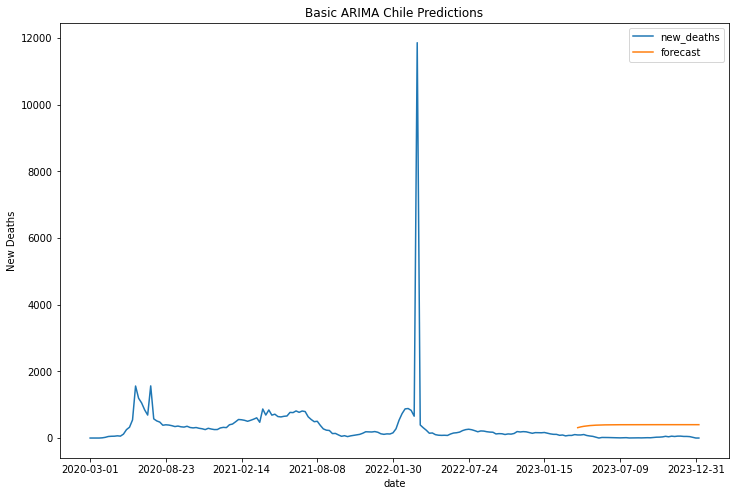

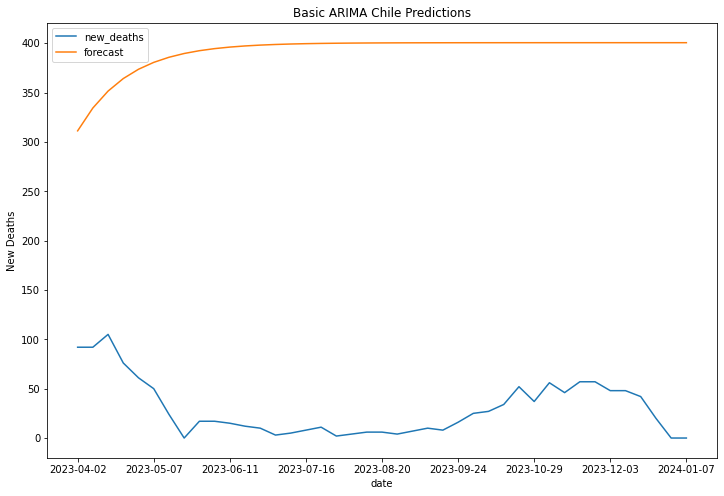

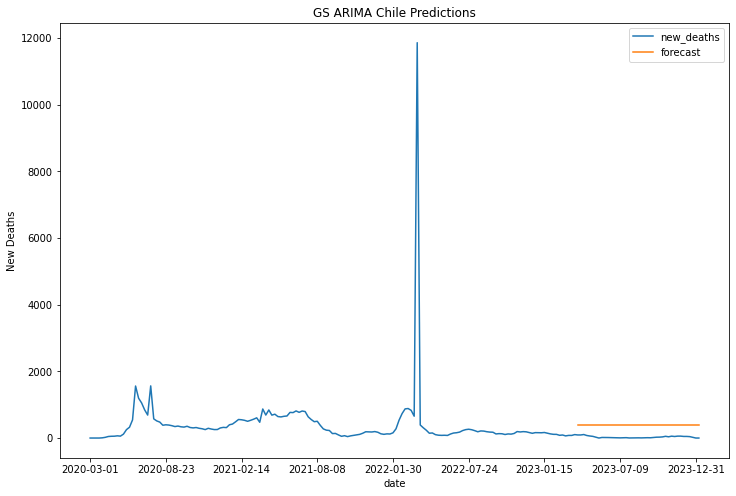

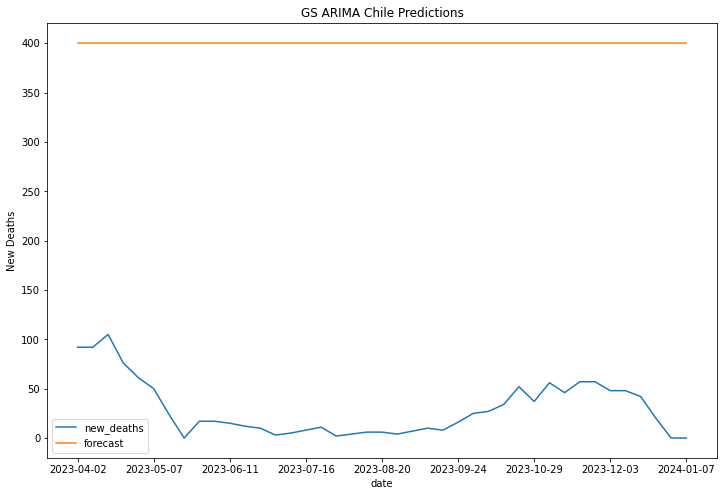

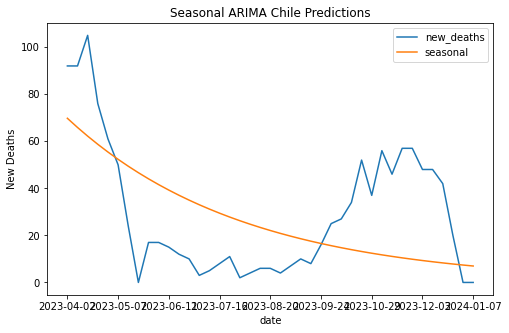

In [150]:
#chile
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(chile_train['new_deaths'],order=(1,0,1))
cmodel_fit=model.fit()


chile['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
chile[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Chile Predictions')
plt.ylabel('New Deaths')
chile_test['forecast']=cmodel_fit.predict(start=161,end=202,dynamic=True)
chile_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Chile Predictions')
plt.ylabel('New Deaths')
actuals = chile_test['new_deaths']  
predictions = chile_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a chile',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(chile_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


xmodel=ARIMA(chile_train['new_deaths'],order=(p,0,q))
c_model_fit=xmodel.fit()

chile['forecast']=c_model_fit.predict(start=161,end=202,dynamic=True)
chile[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Chile Predictions')
plt.ylabel('New Deaths')
chile_test['forecast']=c_model_fit.predict(start=161,end=202,dynamic=True)
chile_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Chile Predictions')
plt.ylabel('New Deaths')

actuals =chile_test['new_deaths']  
predictions = chile_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched chile',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(chile_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(chile_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
chile_test['seasonal'] = pred
mae = mean_absolute_error( chile_test['new_deaths'], chile_test['seasonal'])
mase = mean_absolute_scaled_error(chile_test['new_deaths'], chile_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal chile',mae, mase]


chile_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Chile Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95287D+00    |proj g|=  1.24345D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.243D-09   5.953D+00
  F =   5.9528734154434684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.78241D+00    |proj g|=  8.73695D-03

At iterate   25    f=  5.77852D+00    |proj g|=  7.14622D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     44      1     0     0   8.975D-06   5.779D+00
  F =   5.7785197968750062     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81136D+00    |proj g|=  1.13009D-01

At iterate    5    f=  5.80123D+00    |proj g|=  3.94850D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.78776D+00    |proj g|=  1.88681D-02

At iterate   10    f=  5.77919D+00    |proj g|=  2.35395D-02

At iterate   15    f=  5.77853D+00    |proj g|=  2.14282D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   2.143D-06   5.779D+00
  F =   5.7785323317160628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79030D+00    |proj g|=  5.69985D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.72690D+00    |proj g|=  3.95566D-04

At iterate   30    f=  5.72686D+00    |proj g|=  4.41338D-03

At iterate   35    f=  5.72631D+00    |proj g|=  4.85539D-03

At iterate   40    f=  5.72568D+00    |proj g|=  6.63368D-03

At iterate   45    f=  5.72562D+00    |proj g|=  1.03190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     63      1     0     0   1.032D-03   5.726D+00
  F =   5.7256164458447181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26340D+00    |proj g|=  9.79184D-02

At iterate   20    f=  5.25160D+00    |proj g|=  1.81690D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     23      1     0     0   4.522D-07   5.252D+00
  F =   5.2515975509992749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.31765D+00    |proj g|=  7.45299D+00

At iterate    5    f=  5.72038D+00    |proj g|=  4.73885D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.47232D+00    |proj g|=  4.36486D-02

At iterate   15    f=  5.24741D+00    |proj g|=  5.15277D-03

At iterate   20    f=  5.16700D+00    |proj g|=  3.15252D-02

At iterate   25    f=  5.16233D+00    |proj g|=  5.55414D-04

At iterate   30    f=  5.16190D+00    |proj g|=  5.12751D-03

At iterate   35    f=  5.16128D+00    |proj g|=  1.13767D-03

At iterate   40    f=  5.16119D+00    |proj g|=  2.61199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     75      1     0     0   4.946D-04   5.161D+00
  F =   5.1611439826593886     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78769D+00    |proj g|=  7.17627D-01

At iterate    5    f=  5.50713D+00    |proj g|=  1.20833D-02

At iterate   10    f=  5.35058D+00    |proj g|=  9.43765D-02

At iterate   15    f=  5.28851D+00    |proj g|=  6.66101D-03

At iterate   20    f=  5.27164D+00    |proj g|=  1.25884D-04

At iterate   25    f=  5.23870D+00    |proj g|=  8.10637D-02
  ys=-2.354E-02  -gs= 1.114E-03 BFGS update SKIPPED

At iterate   30    f=  5.21077D+00    |proj g|=  4.02911D-03

At iterate   35    f=  5.20973D+00    |proj g|=  7.72680D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.



At iterate   35    f=  5.24739D+00    |proj g|=  1.75158D-04

At iterate   40    f=  5.22627D+00    |proj g|=  7.14994D-02

At iterate   45    f=  5.20628D+00    |proj g|=  2.84340D-02

At iterate   50    f=  5.20202D+00    |proj g|=  1.51750D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     0     0   1.517D-02   5.202D+00
  F =   5.2020244613160713     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.33686D+00    |proj g|=  1.18605D-02

At iterate   10    f=  5.24624D+00    |proj g|=  9.00949D-02

At iterate   15    f=  5.07881D+00    |proj g|=  1.55044D-02

At iterate   20    f=  5.07854D+00    |proj g|=  1.78869D-02

At iterate   25    f=  4.95919D+00    |proj g|=  8.97598D-02

At iterate   30    f=  4.93733D+00    |proj g|=  1.00488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     55      1     0     0   1.209D-06   4.937D+00
  F =   4.9373255401982235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.98134D+00    |proj g|=  2.84076D-04

At iterate   30    f=  4.98094D+00    |proj g|=  1.36264D-03

At iterate   35    f=  4.97688D+00    |proj g|=  2.25895D-03

At iterate   40    f=  4.97660D+00    |proj g|=  3.22639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     63      1     0     0   1.578D-06   4.977D+00
  F =   4.9765826209605368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.98110D+00    |proj g|=  2.24951D-01

At iterate   25    f=  4.87535D+00    |proj g|=  1.49608D-02

At iterate   30    f=  4.87450D+00    |proj g|=  4.33611D-04

At iterate   35    f=  4.87439D+00    |proj g|=  1.14745D-02

At iterate   40    f=  4.87291D+00    |proj g|=  2.08478D-03

At iterate   45    f=  4.87276D+00    |proj g|=  1.15420D-03

At iterate   50    f=  4.87268D+00    |proj g|=  2.66867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   2.669D-03   4.873D+00
  F =   4.8726819218136708     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.28605D+00    |proj g|=  8.31723D-02

At iterate   15    f=  5.02949D+00    |proj g|=  3.44584D-02

At iterate   20    f=  4.93505D+00    |proj g|=  1.35165D-01

At iterate   25    f=  4.91594D+00    |proj g|=  5.49487D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   3.815D-06   4.916D+00
  F =   4.9159363637797329     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  4.87926D+00    |proj g|=  1.16395D-03

At iterate   35    f=  4.87874D+00    |proj g|=  2.94888D-03

At iterate   40    f=  4.87871D+00    |proj g|=  1.08342D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     67      1     0     0   1.083D-03   4.879D+00
  F =   4.8787124655185137     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84673D+00    |proj g|=  1.92532D-03

At iterate    5    f=  4.84657D+00    |proj g|=  3.91331D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   3.913D-07   4.847D+00
  F =   4.8465734961685749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13476D+00    |proj g|=  4.77817D-01

At iterate    5    f=  4.80464D+00    |proj g|=  1.98257D-02

At iterate   10    f=  4.80013D+00    |proj g|=  7.93846D-03

At iterate   15    f=  4.79884D+00    |proj g|=  1.40696D-02

At iterate   20    f=  4.79792D+00    |proj g|=  7.40839D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   3.209D-06   4.798D+00
  F =   4.7979178527678030     

CONVERG

 This problem is unconstrained.



At iterate   40    f=  4.78984D+00    |proj g|=  4.74998D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     46      1     0     0   4.750D-07   4.790D+00
  F =   4.7898444870716252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71494D+00    |proj g|=  2.72401D-01

At iterate    5    f=  4.65704D+00    |proj g|=  6.24303D-03

At iterate   10    f=  4.65611D+00    |proj g|=  4.27056D-04

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.25131D+00    |proj g|=  5.35579D-03

At iterate   20    f=  5.25097D+00    |proj g|=  3.35167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   7.038D-06   5.251D+00
  F =   5.2509745149051641     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81193D+00    |proj g|=  2.70246D-01

At iterate    5    f=  4.65371D+00    |proj g|=  1.53499D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82835D+00    |proj g|=  5.31832D-01

At iterate    5    f=  4.65298D+00    |proj g|=  1.18264D-02

At iterate   10    f=  4.65042D+00    |proj g|=  2.41880D-03

At iterate   15    f=  4.64945D+00    |proj g|=  5.70050D-03

At iterate   20    f=  4.64936D+00    |proj g|=  3.10089D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   3.101D-05   4.649D+00
  F =   4.6493551962239952     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.94970D+00    |proj g|=  1.09463D-01

At iterate   10    f=  4.67905D+00    |proj g|=  5.23910D-02

At iterate   15    f=  4.66150D+00    |proj g|=  6.47196D-03

At iterate   20    f=  4.65085D+00    |proj g|=  1.58981D-03

At iterate   25    f=  4.65015D+00    |proj g|=  1.66362D-03

At iterate   30    f=  4.64954D+00    |proj g|=  2.00734D-03

At iterate   35    f=  4.64894D+00    |proj g|=  6.02024D-03

At iterate   40    f=  4.64886D+00    |proj g|=  3.05643D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     54      1     0     0   1.654D-05   4.649D+00
  F =   4.64885575655

 This problem is unconstrained.



At iterate    5    f=  4.65355D+00    |proj g|=  1.06733D-02

At iterate   10    f=  4.65105D+00    |proj g|=  3.17422D-03

At iterate   15    f=  4.64998D+00    |proj g|=  6.91729D-03

At iterate   20    f=  4.64965D+00    |proj g|=  3.85164D-03

At iterate   25    f=  4.64935D+00    |proj g|=  7.90648D-04

At iterate   30    f=  4.64935D+00    |proj g|=  1.46254D-04

At iterate   35    f=  4.64319D+00    |proj g|=  3.74716D-02

At iterate   40    f=  4.63587D+00    |proj g|=  7.28102D-03

At iterate   45    f=  4.62570D+00    |proj g|=  1.86519D-02

At iterate   50    f=  4.62402D+00    |proj g|=  7.28877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f=  5.17539D+00    |proj g|=  6.21082D-02

At iterate   25    f=  5.16218D+00    |proj g|=  2.93348D-03
  ys=-1.154E-02  -gs= 5.702E-03 BFGS update SKIPPED

At iterate   30    f=  5.14268D+00    |proj g|=  5.53206D-02

At iterate   35    f=  5.14158D+00    |proj g|=  1.54587D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     47      1     1     0   1.546D-05   5.142D+00
  F =   5.1415801966938615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0    

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  4.70084D+00    |proj g|=  2.56099D-01

At iterate   10    f=  4.62632D+00    |proj g|=  8.99245D-02

At iterate   15    f=  4.60355D+00    |proj g|=  1.87916D-02

At iterate   20    f=  4.60203D+00    |proj g|=  5.54635D-03

At iterate   25    f=  4.60111D+00    |proj g|=  8.96810D-03

At iterate   30    f=  4.60095D+00    |proj g|=  4.36639D-03

At iterate   35    f=  4.59932D+00    |proj g|=  4.71152D-02

At iterate   40    f=  4.59180D+00    |proj g|=  8.02700D-03

At iterate   45    f=  4.59099D+00    |proj g|=  2.30877D-03

At iterate   50    f=  4.59096D+00    |proj g|=  3.47118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   10    f=  4.59315D+00    |proj g|=  9.21772D-03

At iterate   15    f=  4.59098D+00    |proj g|=  2.00524D-03

At iterate   20    f=  4.59097D+00    |proj g|=  7.05356D-04

At iterate   25    f=  4.58631D+00    |proj g|=  2.71362D-02

At iterate   30    f=  4.58226D+00    |proj g|=  1.88979D-02

At iterate   35    f=  4.57931D+00    |proj g|=  1.41338D-02

At iterate   40    f=  4.57844D+00    |proj g|=  7.47770D-04

At iterate   45    f=  4.57842D+00    |proj g|=  1.03047D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     59      1     0     0   1.411D-05   4.578D+00
  F =   4.57842234243

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96137D+00    |proj g|=  5.97838D-01

At iterate    5    f=  4.60217D+00    |proj g|=  5.66601D-02

At iterate   10    f=  4.59425D+00    |proj g|=  2.18409D-02

At iterate   15    f=  4.59315D+00    |proj g|=  1.38645D-02

At iterate   20    f=  4.59101D+00    |proj g|=  5.93214D-03

At iterate   25    f=  4.59097D+00    |proj g|=  2.32117D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     27      1     0     0   

 This problem is unconstrained.



At iterate   25    f=  4.59090D+00    |proj g|=  4.85407D-04

At iterate   30    f=  4.59087D+00    |proj g|=  3.58891D-03

At iterate   35    f=  4.58831D+00    |proj g|=  2.98414D-02

At iterate   40    f=  4.58166D+00    |proj g|=  1.44026D-02

At iterate   45    f=  4.57178D+00    |proj g|=  1.77718D-02

At iterate   50    f=  4.57039D+00    |proj g|=  5.77990D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   5.780D-04   4.570D+00
  F =   4.5703928127551716     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79082D+00    |proj g|=  3.72752D-01

At iterate    5    f=  4.59060D+00    |proj g|=  1.32575D-02

At iterate   10    f=  4.58929D+00    |proj g|=  1.00401D-03

At iterate   15    f=  4.58920D+00    |proj g|=  1.09550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   7.963D-06   4.589D+00
  F =   4.5891973994462258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.58616D+00    |proj g|=  1.03894D-02

At iterate   20    f=  4.58331D+00    |proj g|=  1.30845D-02

At iterate   25    f=  4.56865D+00    |proj g|=  3.10263D-03

At iterate   30    f=  4.56790D+00    |proj g|=  4.40451D-04

At iterate   35    f=  4.56787D+00    |proj g|=  1.46320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     42      1     0     0   6.432D-06   4.568D+00
  F =   4.5678729992087321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.86183D+00    |proj g|=  1.61324D-01

At iterate   10    f=  4.66595D+00    |proj g|=  7.58872D-02

At iterate   15    f=  4.60245D+00    |proj g|=  1.02971D-02

At iterate   20    f=  4.59216D+00    |proj g|=  1.36259D-02

At iterate   25    f=  4.59011D+00    |proj g|=  1.10888D-03

At iterate   30    f=  4.58916D+00    |proj g|=  8.24510D-04

At iterate   35    f=  4.58861D+00    |proj g|=  2.62302D-03

At iterate   40    f=  4.58857D+00    |proj g|=  2.57556D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     47      1     0     0   2.576D-05   4.589D+00
  F =   4.58857194762

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77364D+00    |proj g|=  6.38521D-01

At iterate    5    f=  4.58284D+00    |proj g|=  8.71676D-03

At iterate   10    f=  4.57182D+00    |proj g|=  1.33482D-02

At iterate   15    f=  4.57061D+00    |proj g|=  4.62205D-03

At iterate   20    f=  4.57004D+00    |proj g|=  1.54459D-03

At iterate   25    f=  4.56987D+00    |proj g|=  5.07485D-03

At iterate   30    f=  4.56917D+00    |proj g|=  3.66221D-03

At iterate   35    f=  4.56758D+00    |proj g|=  2.53048D-03

At iterate   40    f=  4.56733D+00    |proj g|=  1.07405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     37      1     0     0   1.991D-06   5.123D+00
  F =   5.1233764355288187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77244D+00    |proj g|=  3.57242D-01

At iterate    5    f=  4.58695D+00    |proj g|=  7.42791D-03

At iterate   10    f=  4.58576D+00    |proj g|=  1.96206D-03

At iterate   15    f=  4.58564D+00    |proj g|=  3.18402D-04

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  4.58424D+00    |proj g|=  2.38781D-03

At iterate   35    f=  4.58413D+00    |proj g|=  5.90377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     53      1     0     0   2.374D-06   4.584D+00
  F =   4.5841276309415155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79392D+00    |proj g|=  7.01671D-01

At iterate    5    f=  4.58331D+00    |proj g|=  2.42987D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     49      1     0     0   1.084D-04   4.565D+00
  F =   4.5645361586164652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76981D+00    |proj g|=  4.23449D-01

At iterate    5    f=  4.58458D+00    |proj g|=  1.23631D-02

At iterate   10    f=  4.58314D+00    |proj g|=  5.37297D-03

At iterate   15    f=  4.58297D+00    |proj g|=  2.61560D-03

At iter

 This problem is unconstrained.


At iterate   15    f=  4.60338D+00    |proj g|=  2.56941D-02

At iterate   20    f=  4.58882D+00    |proj g|=  3.44517D-03

At iterate   25    f=  4.58610D+00    |proj g|=  1.85624D-03

At iterate   30    f=  4.58580D+00    |proj g|=  6.76456D-03

At iterate   35    f=  4.58526D+00    |proj g|=  3.61332D-03

At iterate   40    f=  4.58523D+00    |proj g|=  2.14369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     51      1     0     0   1.885D-05   4.585D+00
  F =   4.5852288766990243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate    5    f=  4.57976D+00    |proj g|=  8.07686D-03

At iterate   10    f=  4.56920D+00    |proj g|=  2.16951D-02

At iterate   15    f=  4.56704D+00    |proj g|=  3.88670D-03

At iterate   20    f=  4.56667D+00    |proj g|=  1.82295D-03

At iterate   25    f=  4.56657D+00    |proj g|=  2.00512D-03

At iterate   30    f=  4.56630D+00    |proj g|=  4.14913D-03

At iterate   35    f=  4.56487D+00    |proj g|=  1.30639D-02

At iterate   40    f=  4.56432D+00    |proj g|=  1.67313D-03

At iterate   45    f=  4.56419D+00    |proj g|=  1.88732D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     53   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.51470D+00    |proj g|=  3.52624D-01

At iterate   10    f=  5.22801D+00    |proj g|=  2.57266D-01

At iterate   15    f=  5.07261D+00    |proj g|=  1.66688D-01

At iterate   20    f=  4.95891D+00    |proj g|=  2.42727D-01

At iterate   25    f=  4.94735D+00    |proj g|=  2.44316D-02

At iterate   30    f=  4.94577D+00    |proj g|=  9.67349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     37      1     0     0   1.099D-04   4.946D+00
  F =   4.9457742247319301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.58290D+00    |proj g|=  5.80848D-03

At iterate   20    f=  4.58205D+00    |proj g|=  3.55352D-03

At iterate   25    f=  4.58204D+00    |proj g|=  2.35117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   2.351D-05   4.582D+00
  F =   4.5820411473734124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19562D+01    |proj g|=  6.46674D+00

At iter

 This problem is unconstrained.



At iterate   35    f=  4.56570D+00    |proj g|=  4.34928D-03

At iterate   40    f=  4.56414D+00    |proj g|=  8.94197D-04

At iterate   45    f=  4.56404D+00    |proj g|=  3.65038D-04

At iterate   50    f=  4.56403D+00    |proj g|=  2.61640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   2.616D-04   4.564D+00
  F =   4.5640325219142603     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17666D+01    |proj g|=  1.30954D+01

At iterate    5    f=  4.87829D+00    |proj g|=  1.13807D-01

At iterate   10    f=  4.67760D+00    |proj g|=  1.10764D-01

At iterate   15    f=  4.59635D+00    |proj g|=  6.43394D-02

At iterate   20    f=  4.58782D+00    |proj g|=  1.68898D-02

At iterate   25    f=  4.58400D+00    |proj g|=  8.53890D-03

At iterate   30    f=  4.58361D+00    |proj g|=  1.70700D-03

At iterate   35    f=  4.58318D+00    |proj g|=  1.08830D-02

At iterate   40    f=  4.58228D+00    |proj g|=  3.90078D-03

At iterate   45    f=  4.58200D+00    |proj g|=  1.94696D-03

At iterate   50    f=  4.58188D+00    |proj g|=  5.17993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   25    f=  4.56618D+00    |proj g|=  7.22394D-03

At iterate   30    f=  4.56547D+00    |proj g|=  5.12658D-03

At iterate   35    f=  4.56453D+00    |proj g|=  1.33842D-02

At iterate   40    f=  4.56413D+00    |proj g|=  3.42552D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     46      1     0     0   2.566D-04   4.564D+00
  F =   4.5641282001413428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

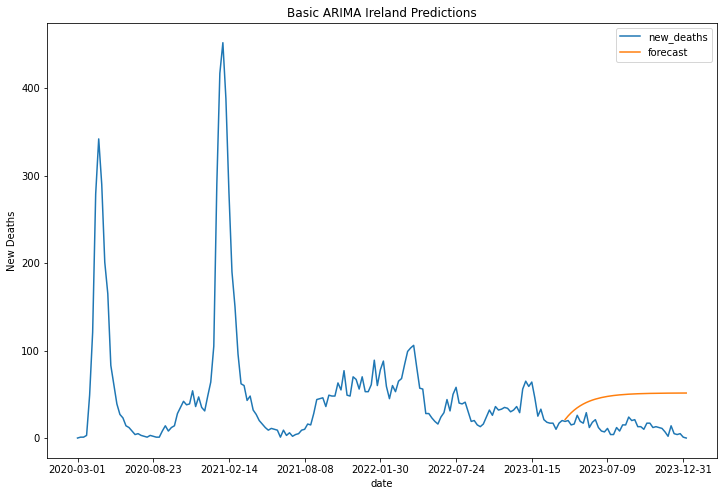

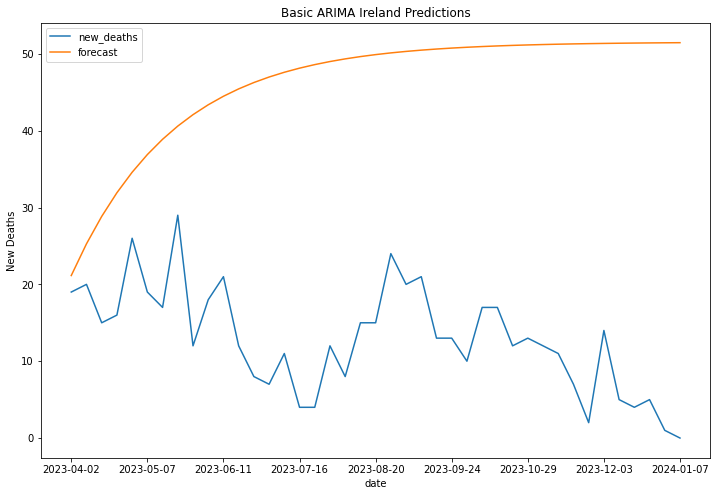

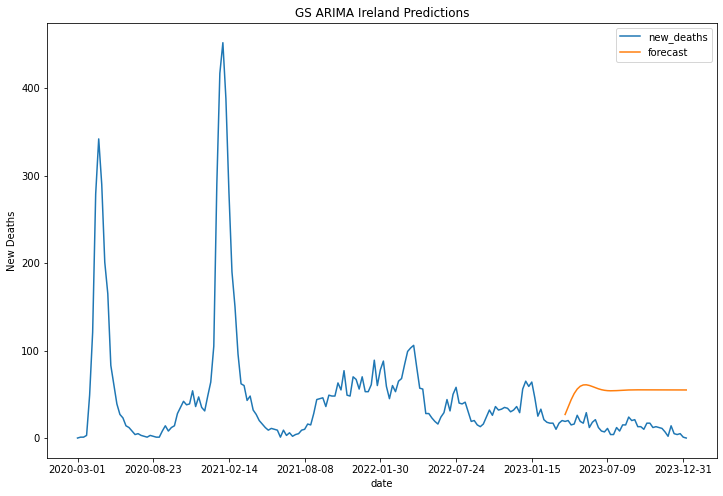

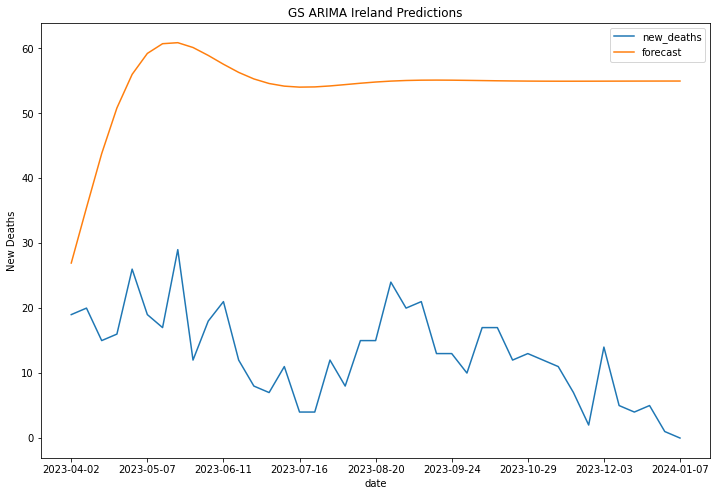

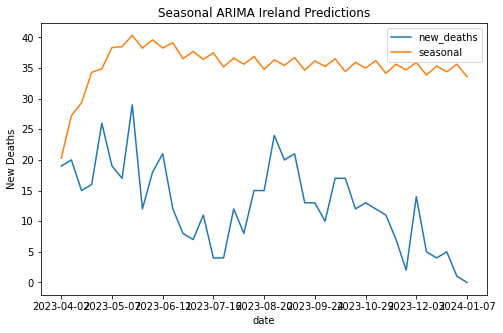

In [151]:
#ireland
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(irela_train['new_deaths'],order=(1,0,1))
m=model.fit()


irela['forecast']=m.predict(start=161,end=202,dynamic=True)
irela[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
irela_test['forecast']=m.predict(start=161,end=202,dynamic=True)
irela_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
actuals = irela_test['new_deaths']  
predictions = irela_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a irela',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(irela_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model=ARIMA(irela_train['new_deaths'],order=(p,0,q))
m2=model.fit()

irela['forecast']=m2.predict(start=161,end=202,dynamic=True)
irela[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Ireland Predictions')
plt.ylabel('New Deaths')
irela_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
irela_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Ireland Predictions')
plt.ylabel('New Deaths')

actuals =irela_test['new_deaths']  
predictions = irela_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched irela',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(irela_train['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(irela_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
irela_test['seasonal'] = pred
mae = mean_absolute_error( irela_test['new_deaths'],irela_test['seasonal'])
mase = mean_absolute_scaled_error(irela_test['new_deaths'],irela_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal irela',mae, mase]


irela_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Ireland Predictions')
plt.ylabel('New Deaths')

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75774D+00    |proj g|=  9.29035D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.290D-08   3.758D+00
  F =   3.7577406752688947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24942D+00    |proj g|=  7.31393D-02

At iterate    5    f=  3.08388D+00    |proj g|=  7.28371D-03

At iterate   10    f=  3.08346D+00    |proj g|=  1.48592D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   1.486D-07   3.083D+00
  F =   3.0834598393555797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09291D+00    |proj g|=  6.70645D-02

At iterate    5    f=  3.01520D+00    |proj g|=  5.01193D-02

At iterate   10    f=  2.99624D+00    |proj g|=  3.13862D-02

At iterate   15    f=  2.99048D+00    |proj g|=  9.01312D-03

At iterate   20    f=  2.99046D+00    |proj g|=  5.25736D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   1.343D-05   2.990D+00
  F =   2.9904634813151008     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     14      1     0     0   5.280D-06   2.842D+00
  F =   2.8423884886922752     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93576D+00    |proj g|=  1.61844D-01

At iterate    5    f=  2.87966D+00    |proj g|=  7.21632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   1.003D-05   2.825D+00
  F =   2.8245310255169036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03150D+00    |proj g|=  5.12324D-01

At iterate    5    f=  2.84709D+00    |proj g|=  1.30386D-02

At iterate   10    f=  2.84625D+00    |proj g|=  9.60095D-04

At iterate   15    f=  2.84621D+00    |proj g|=  6.58891D-04

At iterate   20    f=  2.84607D+00    |proj g|=  1.33983D-03

At iterate   25    f=  2.84607D+00    |proj g|=  1.83714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.79366D+00    |proj g|=  9.53981D-03

At iterate   15    f=  2.79187D+00    |proj g|=  1.47300D-02

At iterate   20    f=  2.79155D+00    |proj g|=  2.61445D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   2.705D-06   2.792D+00
  F =   2.7915502864786665     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12502D+00    |proj g|=  7.35210D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01970D+00    |proj g|=  5.18174D-01

At iterate    5    f=  2.86241D+00    |proj g|=  2.58047D-02

At iterate   10    f=  2.85015D+00    |proj g|=  1.05192D-02

At iterate   15    f=  2.84986D+00    |proj g|=  5.83118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   2.982D-06   2.850D+00
  F =   2.8498601945530333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14163D+00    |proj g|=  7.89747D-01

At iterate    5    f=  2.80547D+00    |proj g|=  3.70707D-02

At iterate   10    f=  2.79486D+00    |proj g|=  1.28279D-02

At iterate   15    f=  2.78814D+00    |proj g|=  8.99774D-03

At iterate   20    f=  2.78771D+00    |proj g|=  3.34649D-03

At iterate   25    f=  2.76891D+00    |proj g|=  7.71425D-02

At iterate   30    f=  2.74180D+00    |proj g|=  2.65895D-02

At iterate   35    f=  2.73547D+00    |proj g|=  1.67102D-02

At iterate   40    f=  2.73537D+00    |proj g|=  3.15522D-03

At iterate   45    f=  2.73509D+00    |proj g|=  2.86952D-03

At iterate   50    f=  2.73504D+00    |proj g|=  3.69851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.81097D+00    |proj g|=  1.26818D-02

At iterate   10    f=  2.80917D+00    |proj g|=  9.28474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   1.065D-06   2.809D+00
  F =   2.8091696873017535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20662D+00    |proj g|=  7.43613D-01

At iterate    5    f=  2.80312D+00    |proj g|=  1.55809D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94613D+00    |proj g|=  2.88168D-01

At iterate    5    f=  2.82539D+00    |proj g|=  5.16361D-02

At iterate   10    f=  2.77855D+00    |proj g|=  4.06366D-02

At iterate   15    f=  2.77567D+00    |proj g|=  1.98329D-03

At iterate   20    f=  2.77562D+00    |proj g|=  1.24143D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   5.104D-06   2.776D+00
  F =   2.7756217782094272     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24488D+00    |proj g|=  7.32379D-01

At iterate    5    f=  2.85328D+00    |proj g|=  2.07961D-02

At iterate   10    f=  2.85132D+00    |proj g|=  3.13391D-03

At iterate   15    f=  2.84989D+00    |proj g|=  1.69273D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.098D-05   2.850D+00
  F =   2.8498700247888009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  2.76246D+00    |proj g|=  7.41558D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     33      1     0     0   3.649D-05   2.762D+00
  F =   2.7624543682597795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56692D+00    |proj g|=  1.53535D+00

At iterate    5    f=  2.79409D+00    |proj g|=  4.97467D-02

At iterate   10    f=  2.79120D+00    |proj g|=  3.04414D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.78144D+00    |proj g|=  5.67303D-04

At iterate   25    f=  2.78143D+00    |proj g|=  7.90106D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     26      1     0     0   7.901D-06   2.781D+00
  F =   2.7814342854144494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95893D+00    |proj g|=  1.97418D-01

At iterate    5    f=  2.82833D+00    |proj g|=  3.69983D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.78635D+00    |proj g|=  6.91814D-03

At iterate   20    f=  2.78486D+00    |proj g|=  9.56058D-03

At iterate   25    f=  2.78446D+00    |proj g|=  3.91038D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     34      1     0     0   1.904D-06   2.784D+00
  F =   2.7844584697622063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23634D+00    |proj g|=  8.88858D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97367D+00    |proj g|=  2.08985D-01

At iterate    5    f=  2.78224D+00    |proj g|=  9.59141D-02

At iterate   10    f=  2.76654D+00    |proj g|=  5.46444D-03

At iterate   15    f=  2.76630D+00    |proj g|=  7.93190D-05

At iterate   20    f=  2.76629D+00    |proj g|=  5.28845D-04

At iterate   25    f=  2.76628D+00    |proj g|=  5.91616D-04

At iterate   30    f=  2.76628D+00    |proj g|=  7.59443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   20    f=  2.78100D+00    |proj g|=  4.49108D-02

At iterate   25    f=  2.75649D+00    |proj g|=  6.52203D-02

At iterate   30    f=  2.73873D+00    |proj g|=  5.99617D-02

At iterate   35    f=  2.73533D+00    |proj g|=  9.77647D-03

At iterate   40    f=  2.73458D+00    |proj g|=  1.65433D-02

At iterate   45    f=  2.73302D+00    |proj g|=  4.19691D-02

At iterate   50    f=  2.73228D+00    |proj g|=  2.73531D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   2.735D-02   2.732D+00
  F =   2.7322837981126233     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  4.55177D+00    |proj g|=  4.11389D-03

At iterate   25    f=  4.55128D+00    |proj g|=  5.85704D-03

At iterate   30    f=  4.55039D+00    |proj g|=  3.94236D-03

At iterate   35    f=  4.54977D+00    |proj g|=  1.38736D-03

At iterate   40    f=  4.54959D+00    |proj g|=  4.59328D-04

At iterate   45    f=  4.54956D+00    |proj g|=  2.10002D-03

At iterate   50    f=  4.54953D+00    |proj g|=  5.02507D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   5.025D-04   4.550D+00
  F =   4.5495322746787510     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

Text(0, 0.5, 'New Deaths')

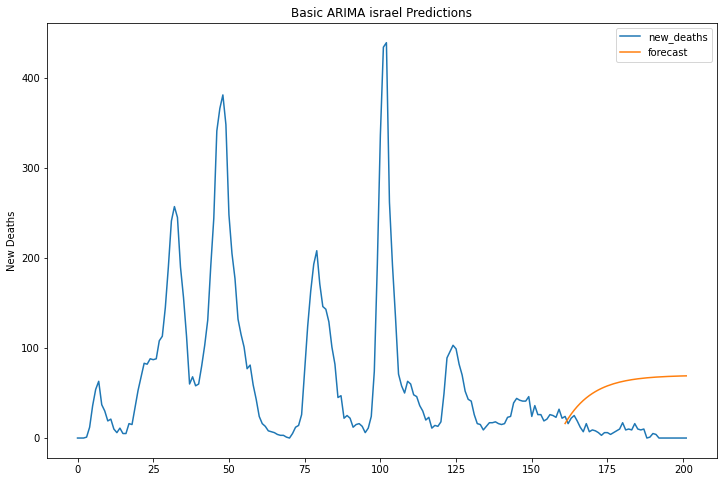

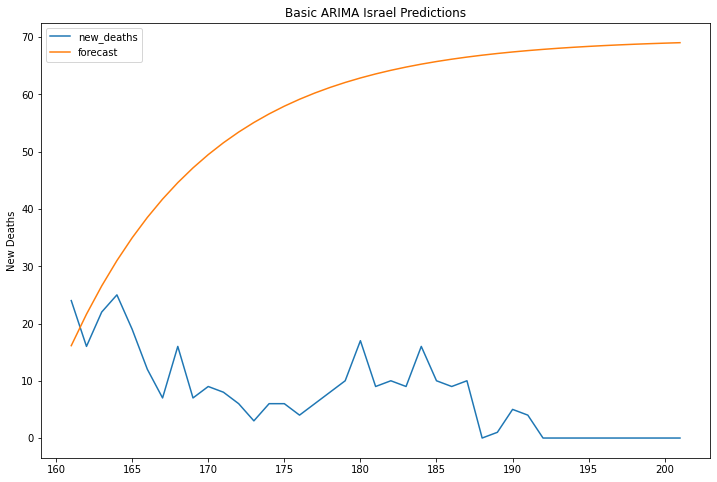

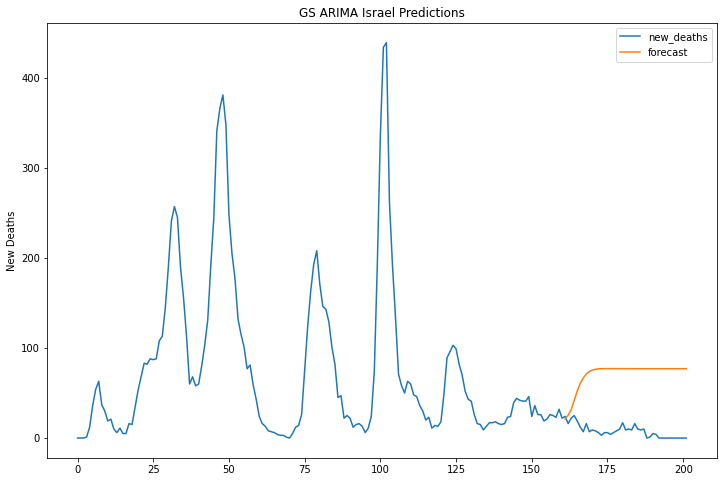

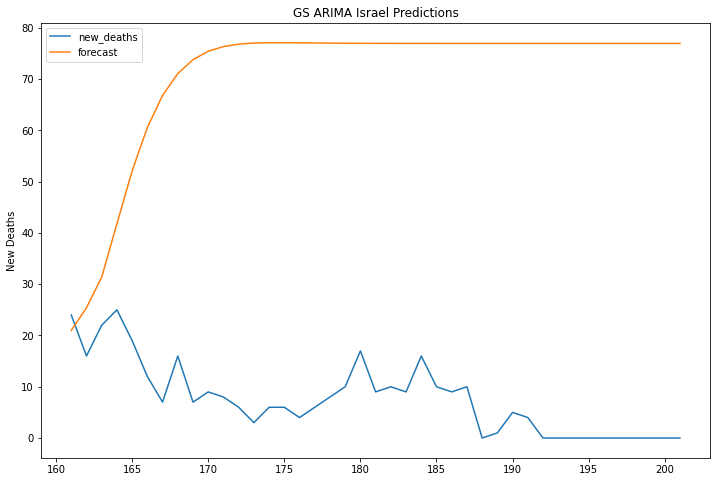

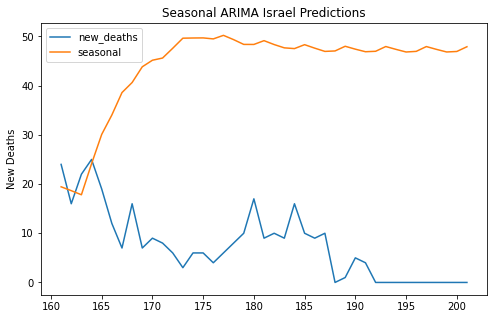

In [157]:
#israel 
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(israe_train['new_deaths'],order=(1,0,1))
m=model.fit()


israe['forecast']=m.predict(start=161,end=202,dynamic=True)
israe[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA israel Predictions')
plt.ylabel('New Deaths')
israe_test['forecast']=m.predict(start=161,end=202,dynamic=True)
israe_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Israel Predictions')
plt.ylabel('New Deaths')
actuals = israe_test['new_deaths']  
predictions = israe_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a israel',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(israe_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(israe_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

israe['forecast']=m2.predict(start=161,end=202,dynamic=True)
israe[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Israel Predictions')
plt.ylabel('New Deaths')
israe_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
israe_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Israel Predictions')
plt.ylabel('New Deaths')

actuals =israe_test['new_deaths']  
predictions = israe_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched israe',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(israe_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(israe_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
israe_test['seasonal'] = pred
mae = mean_absolute_error(israe_test['new_deaths'],israe_test['seasonal'])
mase = mean_absolute_scaled_error(israe_test['new_deaths'],israe_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal israe',mae, mase]


israe_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Israel Predictions')
plt.ylabel('New Deaths')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53613D+00    |proj g|=  8.88178D-11

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.882D-11   6.536D+00
  F =   6.5361336838771287     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.07774D+00    |proj g|=  9.81492D-04

At iterate   10    f=  6.07591D+00    |proj g|=  2.02333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   6.543D-06   6.075D+00
  F =   6.0747186700114222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19358D+00    |proj g|=  8.34305D-02

At iterate    5    f=  6.07851D+00    |proj g|=  8.94004D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.81060D+00    |proj g|=  2.34124D-01

At iterate   15    f=  5.73108D+00    |proj g|=  5.17858D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     28      1     0     0   9.219D-08   5.731D+00
  F =   5.7310408367780452     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35078D+00    |proj g|=  7.24913D-01

At iterate    5    f=  6.08166D+00    |proj g|=  2.18011D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.71943D+00    |proj g|=  9.97806D-04

At iterate   25    f=  5.61687D+00    |proj g|=  1.17593D-01

At iterate   30    f=  5.55292D+00    |proj g|=  5.04328D-03

At iterate   35    f=  5.55222D+00    |proj g|=  6.13645D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     61      1     0     0   5.083D-06   5.552D+00
  F =   5.5522227378272211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.88618D+00    |proj g|=  1.72797D+00

At iterate    5    f=  6.06603D+00    |proj g|=  1.34502D-02

At iterate   10    f=  5.62128D+00    |proj g|=  4.65287D-02

At iterate   15    f=  5.59799D+00    |proj g|=  1.24098D-03

At iterate   20    f=  5.59787D+00    |proj g|=  7.13895D-04

At iterate   25    f=  5.59775D+00    |proj g|=  1.26024D-03

At iterate   30    f=  5.59382D+00    |proj g|=  4.67842D-02

At iterate   35    f=  5.55248D+00    |proj g|=  5.98084D-03

At iterate   40    f=  5.54948D+00    |proj g|=  3.00515D-03

At iterate   45    f=  5.54903D+00    |proj g|=  1.65840D-02

At iterate   50    f=  5.54658D+00    |proj g|=  2.46746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-2.510E-02  -gs= 9.674E-04 BFGS update SKIPPED

At iterate   25    f=  5.65345D+00    |proj g|=  4.70262D-02

At iterate   30    f=  5.64909D+00    |proj g|=  1.63840D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     46      1     1     0   1.638D-05   5.649D+00
  F =   5.6490867728292553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.57963D+00    |proj g|=  1.38537D+00

At iterate    5  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.95828D+00    |proj g|=  8.68517D-03

At iterate   10    f=  5.69417D+00    |proj g|=  6.56695D-01

At iterate   15    f=  5.52041D+00    |proj g|=  5.02132D-03

At iterate   20    f=  5.51532D+00    |proj g|=  3.00246D-02

At iterate   25    f=  5.48183D+00    |proj g|=  9.77413D-02

At iterate   30    f=  5.46280D+00    |proj g|=  1.14046D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     63      1     0     0   1.863D-06   5.463D+00
  F =   5.4628003955276005     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.96048D+00    |proj g|=  1.59622D-02

At iterate   10    f=  5.93276D+00    |proj g|=  9.86890D-03

At iterate   15    f=  5.50826D+00    |proj g|=  1.28505D-02

At iterate   20    f=  5.50229D+00    |proj g|=  8.50936D-02

At iterate   25    f=  5.46309D+00    |proj g|=  1.89088D-02

At iterate   30    f=  5.46249D+00    |proj g|=  8.55168D-05

At iterate   35    f=  5.46248D+00    |proj g|=  3.16801D-03

At iterate   40    f=  5.45899D+00    |proj g|=  6.30474D-02

At iterate   45    f=  5.45284D+00    |proj g|=  7.85637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     73   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37480D+00    |proj g|=  2.25118D-01

At iterate    5    f=  5.33870D+00    |proj g|=  3.03084D-03

At iterate   10    f=  5.33680D+00    |proj g|=  5.65346D-03

At iterate   15    f=  5.33201D+00    |proj g|=  7.57846D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   6.487D-06   5.332D+00
  F =   5.3320085584777228     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.32875D+00    |proj g|=  1.15152D-03

At iterate   40    f=  5.32872D+00    |proj g|=  1.49441D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     46      1     0     0   1.657D-05   5.329D+00
  F =   5.3287150534737586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27801D+00    |proj g|=  3.36506D-02

At iterate    5    f=  5.27639D+00    |proj g|=  1.69474D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.27244D+00    |proj g|=  6.52472D-03

At iterate   10    f=  5.27178D+00    |proj g|=  5.14564D-03

At iterate   15    f=  5.27144D+00    |proj g|=  9.91209D-04

At iterate   20    f=  5.27113D+00    |proj g|=  8.23417D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     24      1     0     0   1.426D-05   5.271D+00
  F =   5.2711297354232656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70841D+00    |proj g|=  3.46848D-01

At iterate    5    f=  5.31478D+00    |proj g|=  1.11619D-01

At iterate   10    f=  5.25807D+00    |proj g|=  1.04116D-02

At iterate   15    f=  5.23812D+00    |proj g|=  3.51558D-02

At iterate   20    f=  5.23262D+00    |proj g|=  3.06079D-03

At iterate   25    f=  5.22938D+00    |proj g|=  1.67141D-02

At iterate   30    f=  5.22676D+00    |proj g|=  1.27029D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27529D+00    |proj g|=  1.98455D-02

At iterate    5    f=  5.27254D+00    |proj g|=  6.97534D-04

At iterate   10    f=  5.27253D+00    |proj g|=  5.64660D-04

At iterate   15    f=  5.27252D+00    |proj g|=  2.98576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   9.493D-06   5.273D+00
  F =   5.2725228474570587     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.27148D+00    |proj g|=  2.89073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.449D-05   5.271D+00
  F =   5.2714847592614644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69477D+00    |proj g|=  8.80453D-01

At iterate    5    f=  5.27035D+00    |proj g|=  1.30114D-02

At iterate   10    f=  5.26970D+00    |proj g|=  4.37299D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  5.22689D+00    |proj g|=  7.18516D-03

At iterate   20    f=  5.22375D+00    |proj g|=  3.53188D-03

At iterate   25    f=  5.22331D+00    |proj g|=  2.72634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     29      1     0     0   2.726D-05   5.223D+00
  F =   5.2233091446373763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30822D+00    |proj g|=  4.64134D-03

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.29275D+00    |proj g|=  1.87040D-03

At iterate   15    f=  5.29219D+00    |proj g|=  3.53038D-03

At iterate   20    f=  5.29185D+00    |proj g|=  3.65324D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   3.802D-06   5.292D+00
  F =   5.2918532762260044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31078D+00    |proj g|=  1.02089D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.22714D+00    |proj g|=  1.02358D-02

At iterate   30    f=  5.22683D+00    |proj g|=  6.61666D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   6.617D-06   5.227D+00
  F =   5.2268291562786438     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49225D+00    |proj g|=  5.33819D-01

At iterate    5    f=  5.24920D+00    |proj g|=  1.67832D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.24798D+00    |proj g|=  1.52631D-02

At iterate   10    f=  5.24416D+00    |proj g|=  2.86475D-02

At iterate   15    f=  5.23374D+00    |proj g|=  1.77582D-02

At iterate   20    f=  5.23338D+00    |proj g|=  8.08801D-03

At iterate   25    f=  5.22916D+00    |proj g|=  6.74740D-03

At iterate   30    f=  5.22896D+00    |proj g|=  3.22198D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   3.222D-05   5.229D+00
  F =   5.2289641578159296     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.26238D+00    |proj g|=  2.49798D-02

At iterate   15    f=  5.24005D+00    |proj g|=  4.56334D-02

At iterate   20    f=  5.23281D+00    |proj g|=  1.76357D-02

At iterate   25    f=  5.23149D+00    |proj g|=  2.57052D-03

At iterate   30    f=  5.22997D+00    |proj g|=  8.14540D-03

At iterate   35    f=  5.22740D+00    |proj g|=  1.86377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     53      1     0     0   2.523D-05   5.227D+00
  F =   5.2273882066643633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63655D+00    |proj g|=  2.47129D-01

At iterate    5    f=  5.30973D+00    |proj g|=  8.78249D-02

At iterate   10    f=  5.26122D+00    |proj g|=  9.40378D-03

At iterate   15    f=  5.24684D+00    |proj g|=  2.44773D-02

At iterate   20    f=  5.23739D+00    |proj g|=  1.09185D-02

At iterate   25    f=  5.22952D+00    |proj g|=  1.24744D-02

At iterate   30    f=  5.22779D+00    |proj g|=  2.88366D-03

At iterate   35    f=  5.22425D+00    |proj g|=  2.69038D-02

At iterate   40    f=  5.22284D+00    |proj g|=  1.58979D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.23324D+00    |proj g|=  8.67181D-03

At iterate   10    f=  5.23245D+00    |proj g|=  2.55594D-03

At iterate   15    f=  5.22880D+00    |proj g|=  2.04626D-02

At iterate   20    f=  5.22826D+00    |proj g|=  2.14980D-04

At iterate   25    f=  5.22826D+00    |proj g|=  7.58133D-04

At iterate   30    f=  5.22824D+00    |proj g|=  9.15644D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     35      1     0     0   3.820D-05   5.228D+00
  F =   5.2282441469368832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.26984D+00    |proj g|=  6.01544D-03

At iterate   30    f=  5.26670D+00    |proj g|=  5.90767D-03

At iterate   35    f=  5.26449D+00    |proj g|=  2.99058D-03

At iterate   40    f=  5.25637D+00    |proj g|=  7.75344D-03

At iterate   45    f=  5.25455D+00    |proj g|=  1.41531D-03
  ys=-1.483E-03  -gs= 5.222E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     71      1     1     0   5.548D-03   5.254D+00
  F =   5.2543953626127831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   45    f=  5.22718D+00    |proj g|=  2.49453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     57      1     0     0   3.615D-05   5.227D+00
  F =   5.2271790903136104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39923D+00    |proj g|=  9.88743D-02

At iterate    5    f=  5.25485D+00    |proj g|=  6.53155D-02

At iterate   10    f=  5.23289D+00    |proj g|=  2.45730D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  5.26685D+00    |proj g|=  1.04829D-01

At iterate   10    f=  5.23445D+00    |proj g|=  4.85615D-02

At iterate   15    f=  5.22873D+00    |proj g|=  5.49822D-03

At iterate   20    f=  5.22437D+00    |proj g|=  1.89363D-02

At iterate   25    f=  5.22330D+00    |proj g|=  1.37103D-03

At iterate   30    f=  5.22264D+00    |proj g|=  1.44362D-02

At iterate   35    f=  5.22242D+00    |proj g|=  1.26340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     37     47      1     0     0   1.712D-05   5.222D+00
  F =   5.2224211928918001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.


Text(0, 0.5, 'New Deaths')

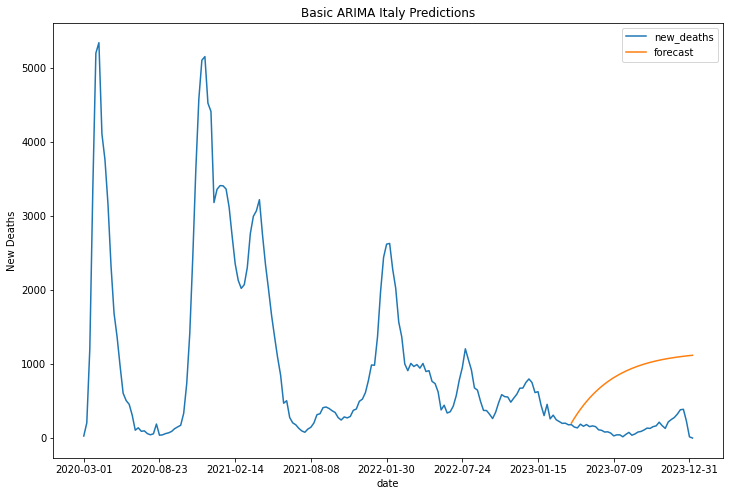

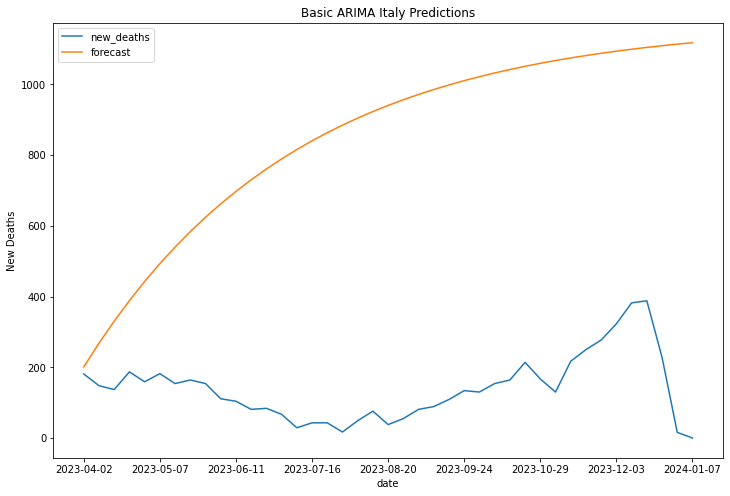

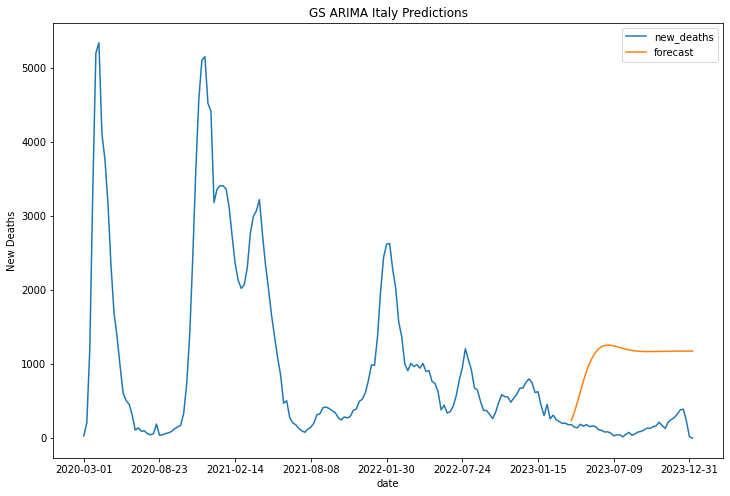

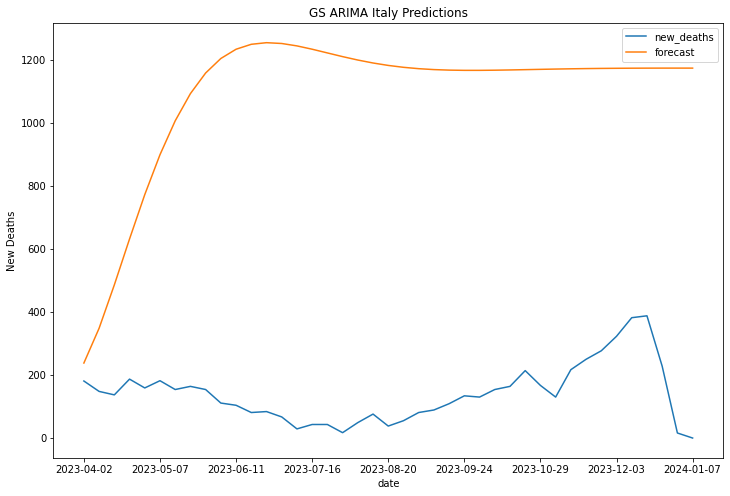

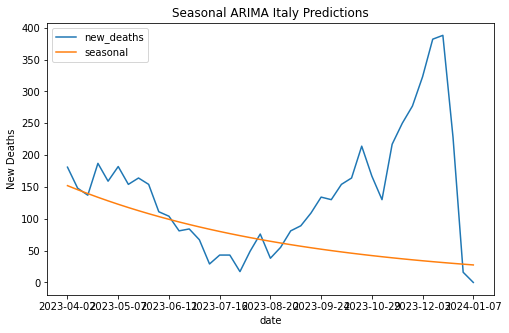

In [153]:
#italy
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(italy_train['new_deaths'],order=(1,0,1))
m=model.fit()


italy['forecast']=m.predict(start=161,end=202,dynamic=True)
italy[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Italy Predictions')
plt.ylabel('New Deaths')
italy_test['forecast']=m.predict(start=161,end=202,dynamic=True)
italy_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA Italy Predictions')
plt.ylabel('New Deaths')
actuals = italy_test['new_deaths']  
predictions = italy_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a italy',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(italy_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(italy_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

italy['forecast']=m2.predict(start=161,end=202,dynamic=True)
italy[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Italy Predictions')
plt.ylabel('New Deaths')
italy_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
italy_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA Italy Predictions')
plt.ylabel('New Deaths')

actuals =italy_test['new_deaths']  
predictions = italy_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched italy',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(italy_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(italy_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
italy_test['seasonal'] = pred
mae = mean_absolute_error(italy_test['new_deaths'],italy_test['seasonal'])
mase = mean_absolute_scaled_error(italy_test['new_deaths'],italy_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal italy',mae, mase]


italy_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA Italy Predictions')
plt.ylabel('New Deaths')

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47397D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.474D+00
  F =   8.4739665903023038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.61700D+00    |proj g|=  1.12754D-03

At iterate   35    f=  7.61699D+00    |proj g|=  9.45056D-04

At iterate   40    f=  7.61678D+00    |proj g|=  8.20261D-04

At iterate   45    f=  7.61467D+00    |proj g|=  1.26459D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     95      2     1     0   3.185D-04   7.615D+00
  F =   7.6146692924736152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06618D+00    |proj g|=  1.15059D-01

At iterate    5    f=  7.99576D+00    |proj g|=  4.72216D-03

At iterate   10    f=  7.99536D+00    |proj g|=  1.93756D-03

At iterate   15    f=  7.64832D+00    |proj g|=  2.12032D-01

At iterate   20    f=  7.46348D+00    |proj g|=  1.01471D-01

At iterate   25    f=  7.45084D+00    |proj g|=  2.17544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     50      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   10    f=  7.99393D+00    |proj g|=  1.41728D-03

At iterate   15    f=  7.99084D+00    |proj g|=  1.16175D-02
  ys=-3.348E-01  -gs= 7.939E-02 BFGS update SKIPPED

At iterate   20    f=  7.91896D+00    |proj g|=  3.27683D-01
  ys=-4.081E-06  -gs= 9.655E-07 BFGS update SKIPPED

At iterate   25    f=  7.82038D+00    |proj g|=  1.02180D-02

At iterate   30    f=  7.80476D+00    |proj g|=  1.76751D-03

At iterate   35    f=  7.78217D+00    |proj g|=  4.70180D-02

At iterate   40    f=  7.74788D+00    |proj g|=  1.87491D-02

At iterate   45    f=  7.74538D+00    |proj g|=  2.87484D-03

At iterate   50    f=  7.54329D+00    |proj g|=  1.71175D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  7.69599D+00    |proj g|=  3.41683D-02

At iterate   30    f=  7.69398D+00    |proj g|=  2.29834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     37      1     0     0   1.290D-07   7.694D+00
  F =   7.6939819300522920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.49914D+00    |proj g|=  1.27186D+00

At iterate    5    f=  7.96183D+00    |proj g|=  1.07493D-02

At itera

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  7.94384D+00    |proj g|=  1.42568D-02

At iterate   15    f=  7.94182D+00    |proj g|=  8.27804D-04

At iterate   20    f=  7.93268D+00    |proj g|=  4.53277D-02

At iterate   25    f=  7.46524D+00    |proj g|=  2.49792D-02

At iterate   30    f=  7.44443D+00    |proj g|=  4.52087D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     47      1     0     0   4.814D-06   7.444D+00
  F =   7.4444285049755221     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.93401D+00    |proj g|=  6.94678D-03

At iterate   20    f=  7.84561D+00    |proj g|=  7.24091D-02

At iterate   25    f=  7.43717D+00    |proj g|=  3.11105D-01

At iterate   30    f=  7.38829D+00    |proj g|=  1.96809D-02

At iterate   35    f=  7.38503D+00    |proj g|=  1.29728D-02

At iterate   40    f=  7.37802D+00    |proj g|=  4.04055D-03

At iterate   45    f=  7.37634D+00    |proj g|=  7.30950D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     73      1     0     0   7.390D-04   7.376D+00
  F =   7.3763374982699776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.47882D+00    |proj g|=  1.12179D-01

At iterate   35    f=  7.44460D+00    |proj g|=  2.80814D-02

At iterate   40    f=  7.44425D+00    |proj g|=  8.65567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     61      1     0     0   1.457D-04   7.444D+00
  F =   7.4442530782889618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14013D+00    |proj g|=  2.55275D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85010D+00    |proj g|=  8.08117D-01

At iterate    5    f=  7.13881D+00    |proj g|=  1.28459D-02

At iterate   10    f=  7.12402D+00    |proj g|=  2.41186D-03

At iterate   15    f=  7.12246D+00    |proj g|=  5.41748D-04

At iterate   20    f=  7.12026D+00    |proj g|=  2.03482D-03

At iterate   25    f=  7.11800D+00    |proj g|=  4.53755D-03

At iterate   30    f=  7.11726D+00    |proj g|=  3.73503D-05

At iterate   35    f=  7.11725D+00    |proj g|=  3.57048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.13888D+00    |proj g|=  5.54184D-02

At iterate   10    f=  7.11863D+00    |proj g|=  3.80210D-03

At iterate   15    f=  7.11809D+00    |proj g|=  3.99576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     24      1     0     0   3.993D-05   7.118D+00
  F =   7.1180851772215510     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02842D+00    |proj g|=  9.16194D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81006D+00    |proj g|=  7.47054D-01

At iterate    5    f=  7.13430D+00    |proj g|=  8.84338D-03

At iterate   10    f=  7.12391D+00    |proj g|=  7.87085D-03

At iterate   15    f=  7.12214D+00    |proj g|=  2.85009D-03

At iterate   20    f=  7.12186D+00    |proj g|=  1.60527D-04

At iterate   25    f=  7.12178D+00    |proj g|=  1.64262D-03

At iterate   30    f=  7.12145D+00    |proj g|=  4.45669D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54642D+00    |proj g|=  5.18035D-01

At iterate    5    f=  7.14809D+00    |proj g|=  8.25786D-02

At iterate   10    f=  7.11912D+00    |proj g|=  8.70611D-03

At iterate   15    f=  7.11708D+00    |proj g|=  7.34199D-05

At iterate   20    f=  7.11708D+00    |proj g|=  5.17498D-04

At iterate   25    f=  7.11702D+00    |proj g|=  4.04704D-03

At iterate   30    f=  7.11697D+00    |proj g|=  1.35519D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.12934D+00    |proj g|=  2.23731D-02

At iterate   15    f=  7.12221D+00    |proj g|=  5.93652D-03

At iterate   20    f=  7.11788D+00    |proj g|=  4.26663D-03

At iterate   25    f=  7.11604D+00    |proj g|=  2.67026D-02

At iterate   30    f=  7.10591D+00    |proj g|=  9.82476D-03

At iterate   35    f=  7.10404D+00    |proj g|=  2.76335D-03

At iterate   40    f=  7.10378D+00    |proj g|=  2.41213D-03

At iterate   45    f=  7.10324D+00    |proj g|=  1.21090D-03

At iterate   50    f=  7.10319D+00    |proj g|=  9.11551D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.31289D+00    |proj g|=  5.81214D-03

At iterate   15    f=  7.25959D+00    |proj g|=  2.02559D-01

At iterate   20    f=  7.19659D+00    |proj g|=  3.37705D-03

At iterate   25    f=  7.19656D+00    |proj g|=  7.60989D-04

At iterate   30    f=  7.16397D+00    |proj g|=  7.78960D-02
  ys=-7.755E-02  -gs= 6.248E-03 BFGS update SKIPPED

At iterate   35    f=  7.12161D+00    |proj g|=  3.26604D-02

At iterate   40    f=  7.11999D+00    |proj g|=  5.32684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     61      1     1     0   4.028D-06   7.120D+00
  F =   7.1199935191732253     

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  7.25188D+00    |proj g|=  2.69177D-01

At iterate   30    f=  7.19359D+00    |proj g|=  3.08728D-03

At iterate   35    f=  7.19118D+00    |proj g|=  3.03920D-02
  ys=-1.617E-01  -gs= 1.727E-02 BFGS update SKIPPED

At iterate   40    f=  7.13740D+00    |proj g|=  3.15050D-03

At iterate   45    f=  7.13135D+00    |proj g|=  8.56647D-02

At iterate   50    f=  7.12316D+00    |proj g|=  1.27864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     97      2     1     0   1.279D-03   7.123D+00
  F =   7.1231574102481767     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.33310D+00    |proj g|=  1.55184D-02

At iterate   15    f=  7.29110D+00    |proj g|=  7.55463D-02

At iterate   20    f=  7.22866D+00    |proj g|=  2.41919D-01

At iterate   25    f=  7.13085D+00    |proj g|=  5.47242D-03

At iterate   30    f=  7.12082D+00    |proj g|=  3.84574D-02

At iterate   35    f=  7.11932D+00    |proj g|=  4.84874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     38      1     0     0   4.849D-06   7.119D+00
  F =   7.1193174454862991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14210D+00    |proj g|=  3.31800D-02

At iterate    5    f=  7.11420D+00    |proj g|=  1.06397D-02

At iterate   10    f=  7.11069D+00    |proj g|=  7.51970D-04

At iterate   15    f=  7.11068D+00    |proj g|=  9.44307D-04

At iterate   20    f=  7.11046D+00    |proj g|=  9.24681D-03

At iterate   25    f=  7.11027D+00    |proj g|=  1.07149D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.11880D+00    |proj g|=  4.18439D-03

At iterate   35    f=  7.11751D+00    |proj g|=  2.91605D-02

At iterate   40    f=  7.11245D+00    |proj g|=  7.79106D-03

At iterate   45    f=  7.11066D+00    |proj g|=  3.40350D-04

At iterate   50    f=  7.11066D+00    |proj g|=  6.63785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     0     0   6.638D-04   7.111D+00
  F =   7.1106576294885215     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.12011D+00    |proj g|=  7.53984D-05

At iterate   35    f=  7.12010D+00    |proj g|=  8.80089D-04

At iterate   40    f=  7.11994D+00    |proj g|=  6.05715D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     48      1     0     0   1.521D-04   7.120D+00
  F =   7.1199443649929837     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60640D+00    |proj g|=  7.41582D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13613D+00    |proj g|=  4.91859D-02

At iterate    5    f=  7.12903D+00    |proj g|=  1.23421D-03

At iterate   10    f=  7.12741D+00    |proj g|=  9.84416D-04

At iterate   15    f=  7.12741D+00    |proj g|=  2.67780D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   2.678D-05   7.127D+00
  F =   7.1274065900910921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  7.12278D+00    |proj g|=  7.43454D-03

At iterate   15    f=  7.12231D+00    |proj g|=  1.97613D-03

At iterate   20    f=  7.12177D+00    |proj g|=  1.65368D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   2.061D-05   7.122D+00
  F =   7.1217709345284881     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81677D+00    |proj g|=  7.56065D-01

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.11516D+00    |proj g|=  1.87256D-02

At iterate   35    f=  7.11440D+00    |proj g|=  4.06411D-04

At iterate   40    f=  7.11385D+00    |proj g|=  8.95046D-03

At iterate   45    f=  7.11323D+00    |proj g|=  8.63479D-04

At iterate   50    f=  7.11321D+00    |proj g|=  1.30056D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.301D-04   7.113D+00
  F =   7.1132087548995893     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  7.10992D+00    |proj g|=  7.63906D-03

At iterate   35    f=  7.10548D+00    |proj g|=  6.90131D-03

At iterate   40    f=  7.10500D+00    |proj g|=  4.73359D-03

At iterate   45    f=  7.10384D+00    |proj g|=  6.10070D-03

At iterate   50    f=  7.10341D+00    |proj g|=  2.00747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     68      1     0     0   2.007D-03   7.103D+00
  F =   7.1034054797503083     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.20309D+00    |proj g|=  3.88389D-02
  ys=-1.387E-03  -gs= 2.609E-02 BFGS update SKIPPED

At iterate   25    f=  7.14582D+00    |proj g|=  9.58651D-03

At iterate   30    f=  7.13813D+00    |proj g|=  9.90139D-02

At iterate   35    f=  7.11933D+00    |proj g|=  4.46393D-03

At iterate   40    f=  7.11894D+00    |proj g|=  5.34776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     64      1     1     0   1.912D-05   7.119D+00
  F =   7.1189338674088152     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     81      2     1     0   4.857D+04  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05130D+00    |proj g|=  5.31347D-01

At iterate    5    f=  7.40747D+00    |proj g|=  5.03862D-01

At iterate   10    f=  7.30202D+00    |proj g|=  9.52724D-03

At iterate   15    f=  7.29948D+00    |proj g|=  2.14308D-02

At iter

LinAlgError: LU decomposition error.

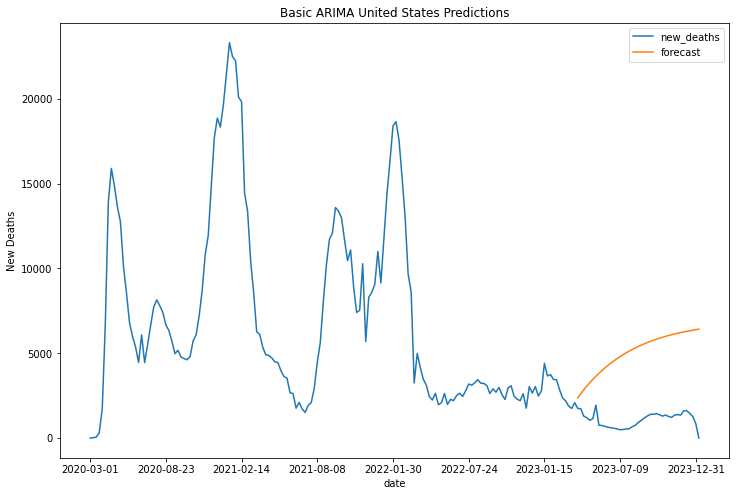

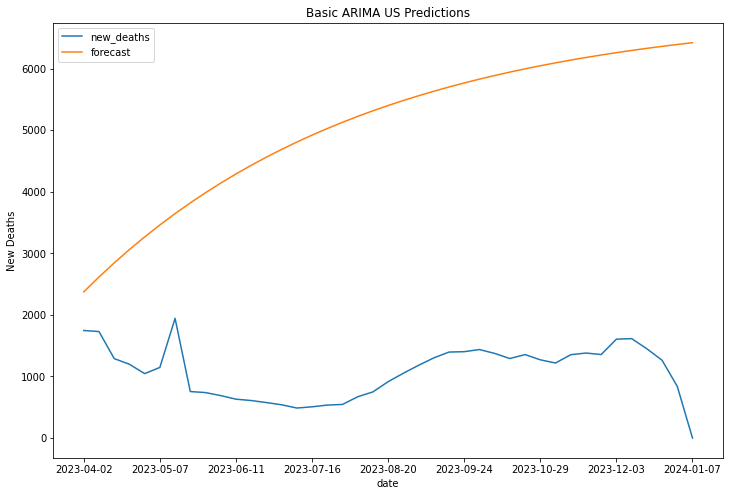

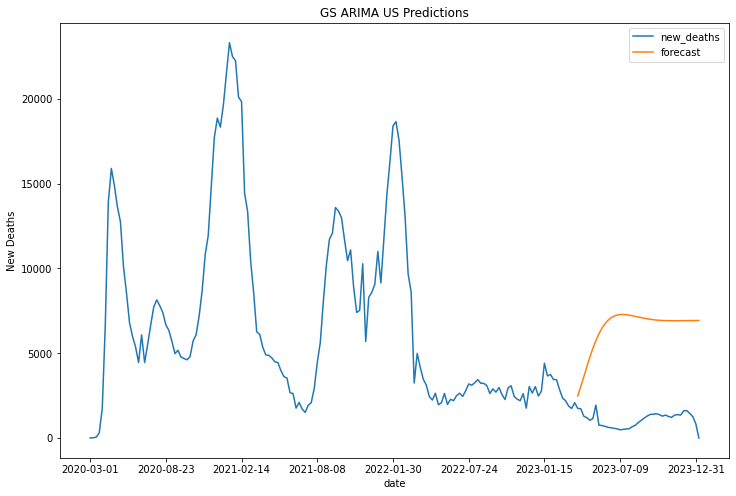

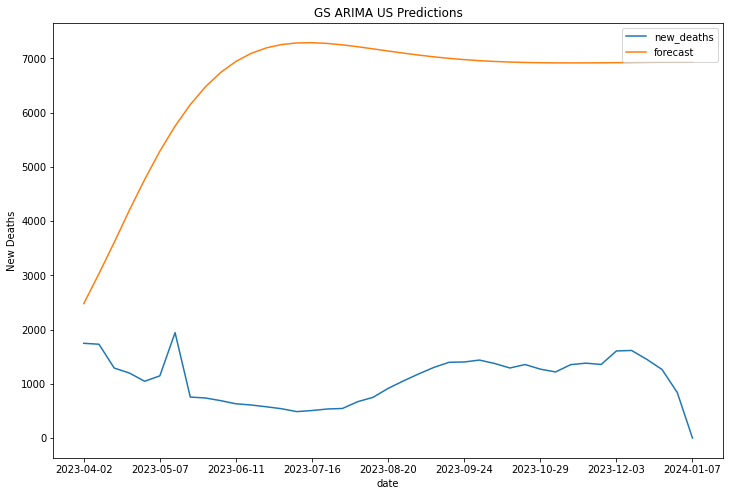

In [155]:
#us
# the most basic model -- with differencing
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(us_train['new_deaths'],order=(1,0,1))
m=model.fit()


us['forecast']=m.predict(start=161,end=202,dynamic=True)
us[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA United States Predictions')
plt.ylabel('New Deaths')
us_test['forecast']=m.predict(start=161,end=202,dynamic=True)
us_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('Basic ARIMA US Predictions')
plt.ylabel('New Deaths')
actuals = us_test['new_deaths']  
predictions = us_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['base a us',mae, mase]


results = []
for p in range(0,4):
    for q in range(0,4):
        model=ARIMA(us_train['new_deaths'],order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_grid = pd.DataFrame(results, columns=['p','q','aic']).sort_values('aic')
p,q = results_grid.iloc[0,0], results_grid.iloc[0,1]


model2=ARIMA(us_train['new_deaths'],order=(p,0,q))
m2=model2.fit()

us['forecast']=m2.predict(start=161,end=202,dynamic=True)
us[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA US Predictions')
plt.ylabel('New Deaths')
us_test['forecast']=m2.predict(start=161,end=202,dynamic=True)
us_test[['new_deaths','forecast']].plot(figsize=(12,8))
plt.title('GS ARIMA US Predictions')
plt.ylabel('New Deaths')

actuals =us_test['new_deaths']  
predictions = us_test['forecast'] 
mase = mean_absolute_scaled_error(actuals, predictions)
mae = mean_absolute_error(actuals,predictions)
metrics_df.loc[len(metrics_df)] = ['grid searched us',mae, mase]

#seasonal 
warnings.filterwarnings("ignore",category =  UserWarning)
import statsmodels.api as sm

if 1:
    results=[]
    for p in range(0,3):
        for q in range(0,3):
            for P in range(0,3):
                for Q in range(0,3):
                    model=sm.tsa.statespace.SARIMAX(us_test['new_deaths'],order=(p,0,q), seasonal_order=(P,0,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p, 0, q),seasonal_order=(P,0,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
us_test['seasonal'] = pred
mae = mean_absolute_error(us_test['new_deaths'],us_test['seasonal'])
mase = mean_absolute_scaled_error(us_test['new_deaths'],us_test['seasonal'])

metrics_df.loc[len(metrics_df)] = ['gs seasonal us',mae, mase]

us_test[['new_deaths','seasonal']].plot(figsize=(8,5))
plt.title('Seasonal ARIMA US Predictions')
plt.ylabel('New Deaths')

In [158]:
metrics_df

,Model,MAE,mase
0,base a czech,30.548392,5.049321
1,base grid searched czech,30.311640,5.010188
2,gs seasonal czech,24.199009,3.999836
3,base a eston,5.808277,2.833306
4,grid searched eston,5.931483,2.893406
5,gs seasonal eston,5.902175,2.879110
6,base a franc,117.930514,9.827543
7,grid searched franc,753.078087,62.756507
8,gs seasonal franc,126.121873,10.510156
9,base a malay,19.261252,3.379167
